# Exploratory Data Analysis

Comprehensive data exploration for the [Ames](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) housing dataset. In this kernel, each feature will be studied and guidelines will be outlined to preprocess each of them.

## Outline
- [0. Overview](#0)
- [1. Read data and expand dataset](#1)
- [2. Dependent Variable](#2)
- [3. Independent variables](#3)
  - [3.1 MS SubClass](#3.1)
  - [3.2 MS Zoning](#3.2)
  - [3.3 Lot Frontage](#3.3)
  - [3.4 Lot Area](#3.4)
  - [3.5 Street](#3.5)
  - [3.6 Alley](#3.6)
  - [3.7 LotShape](#3.7)
  - [3.8 LandContour](#3.8)
  - [3.9 Utilities](#3.9)
  - [3.10 Lot Configuration](#3.10)
  - [3.11 Land Slope](#3.11)
  - [3.12 Neighborhood](#3.12)
  - [3.13 Condition 1](#3.13)
  - [3.14 Condition 2](#3.14)
  - [3.15 Building Type](#3.15)
  - [3.16 House Style](#3.16)
  - [3.17 Overall Quality](#3.17)
  - [3.18 Overall Condition](#3.18)
  - [3.19 Year Built](#3.19)
  - [3.20 Year Remodelation Added](#3.20)
  - [3.21 Roof Style](#3.21)
  - [3.22 Roof Material](#3.22)
  - [3.23 Exterior 1st](#3.23)
  - [3.24 Exterior 2nd](#3.24)
  - [3.25 Masonry Veneer Type](#3.25)
  - [3.26 Masonry veneer Area](#3.26) 
  - [3.27 Exterior Quality](#3.27)
  - [3.28 Exterior Condition](#3.28)
  - [3.29 Foundation](#3.29)
  - [3.30 Basement Features](#3.30)
  - [3.31 Heating](#3.31)
  - [3.32 Heating Quality](#3.32)
  - [3.33 Central Air](#3.33)
  - [3.34 Electrical](#3.34)
  - [3.35 1st Floor Area](3.35)
  - [3.36 2nd Floor Area](#3.36)
  - [3.37 Low Quality Area](#3.37)
  - [3.38 Ground Area](#3.38)
  - [3.39 Basement Full Bath](#3.39)
  - [3.40 Basement Half Bath](#3.40)
  - [3.41 Full Bath](#3.41)
  - [3.42 Half Bath](#3.42)
  - [3.43 Beedroom](#3.43)
  - [3.44 Kitchen](#3.44)
  - [3.45 Kitchen Quality](#3.45)
  - [3.46 Total Rooms](#3.46)
  - [3.47 Functional](#3.47)
  - [3.48 Fireplaces](#3.48)
  - [3.49 Fireplace Quality](#3.49)
  - [3.50 Garage Features](#3.50)
  - [3.51 Paved Driveway](#3.51)
  - [3.52 Wood Deck Area](#3.52)
  - [3.53 Open Porch Area](#3.53)
  - [3.54 Enclosed Porch Area](#3.54)
  - [3.55 3 Season Porch](#3.55)
  - [3.56 Screen Porch](#3.56)
  - [3.57 Pool Area](#3.57)
  - [3.58 Pool Quality](#3.58)
  - [3.59 Fence](#3.59)
  - [3.60 Miscellaneous Feature](#3.60)
  - [3.61 Miscellaneous Value](#3.61)
  - [3.62 Month Sold](#3.62)
  - [3.63 Year Sold](#3.63)
  - [3.64 Sale Type](#3.64)
  - [3.65 Sale Condition](#3.65)

<a name='0'></a>
# 0. Overview

The Ames housing dataset examines features of houses sold in Ames during the 2006–2010 timeframe. The goal is to use the training data to predict the sale prices of the houses in the testing data. There are 81 features in this dataset and we will try to visualize them, impute missing values and outline guidelines for preprocessing.

Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler, power_transform
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<a name='1'></a>
# 1. Read data

In [3]:
# read files
df_train = pd.read_csv('input/train.csv')
df_train['Train/Test'] = np.zeros(len(df_train.index))
df_test = pd.read_csv('input/test.csv')
df_test['Train/Test'] = np.ones(len(df_test.index))

In [4]:
# check dataframe
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

<a name='2'></a>
# 2. Dependent variable

Let's model our target varible: 'SalePrice'

In [5]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

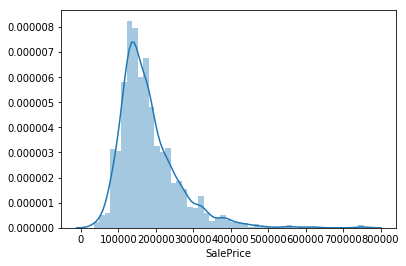

In [6]:
# plot histogram
sns.distplot(df_train['SalePrice']);

- Deviates from a normal distribution
- Positive skewness
- Peakness

In [7]:
# skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Given these observations, a log transform will make it more normally distributed.


**NOTE: LOG TRANSFORM TARGET VARIABLE**


<a name='3'></a>
# 3. Dependent variable

Let's look at the independent variables now and their relationship with 'SalePrice'. As noted before, there are 80 features that we will analize.

<a name='3.1'></a>
## 3.1 MSSubClass
Identifies the type of dwelling involved in the sale.

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES
       
This is a categorical feature. Let's see how it looks against the sale price.

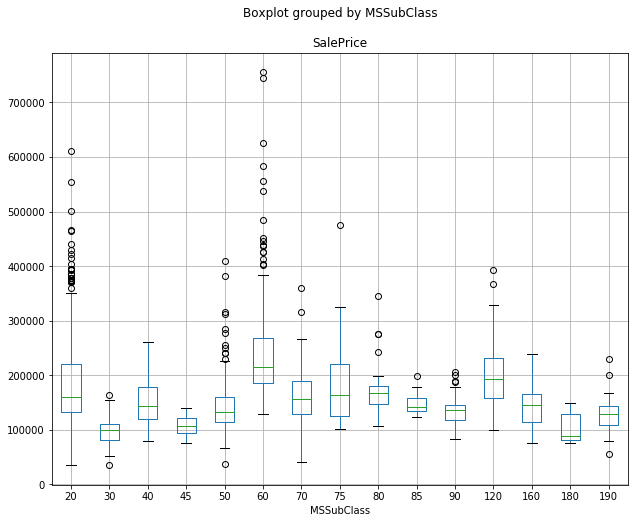

In [8]:
df_train.boxplot(column='SalePrice', by='MSSubClass', figsize=(10,8))

There seems to be no outliers. Let's check if there are any missing values.

In [9]:
print('Missing in train: ', df_train['MSSubClass'].isnull().sum())
print('Missing in test: ', df_test['MSSubClass'].isnull().sum())

Missing in train:  0
Missing in test:  0


Also, we need to make sure we have the same labels on each set.

In [10]:
print('Unique values in train: ', len(df_train['MSSubClass'].unique()))
print('Unique values in test: ', len(df_test['MSSubClass'].unique()))

Unique values in train:  15
Unique values in test:  16


We find that there is one unique value in the test set that is not present in the train set. Maybe we can do something about it using the other related feature 'MSZoning'.

<a name='3.2'></a>
## 3.2 MSZoning
Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
       
Also a categorical feature. Plotting it against the sale price:

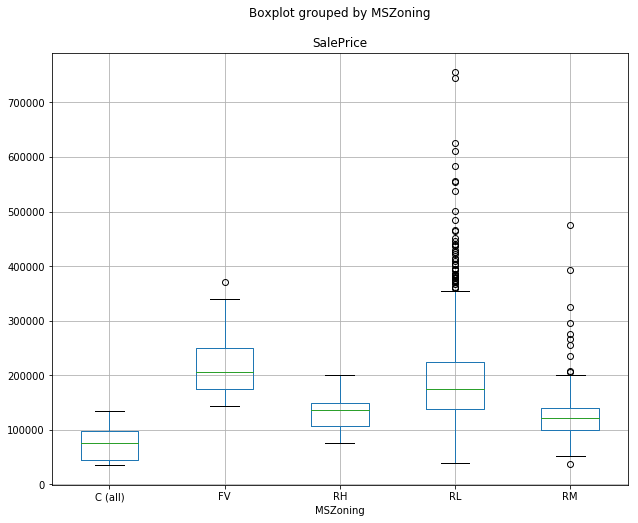

In [11]:
df_train.boxplot('SalePrice', 'MSZoning', figsize=(10,8) )

Check if missing values:

In [12]:
print('Missing in train: ', df_train['MSZoning'].isnull().sum())
print('Missing in test: ', df_test['MSZoning'].isnull().sum())

Missing in train:  0
Missing in test:  4


We can fill the nan values in the testset by using the mode of the MSZoning in training by grouping similar MSSubClasses.

**NOTE: Fill MSZoning missing values in test set**

In [13]:
df_full = pd.concat([df_train, df_test]).reset_index(drop=True)
df_full['MSZoning'] = df_full.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

Separate back to train and test.

In [14]:
df_train = df_full[df_full['Train/Test']==0].reset_index(drop=True)
df_test = df_full[df_full['Train/Test']==1].reset_index(drop=True)
print('Missing in train: ', df_train['MSZoning'].isnull().sum())
print('Missing in test: ', df_test['MSZoning'].isnull().sum())

Missing in train:  0
Missing in test:  0


Let's check the unique labels

In [15]:
print('Unique values in train: ', len(df_train['MSZoning'].unique()))
print('Unique values in test: ', len(df_test['MSZoning'].unique()))

Unique values in train:  5
Unique values in test:  5


Going back to our problem for the extra MSSubClass found in the test set that is not in the train set. We will use the information from MSZoning to change the label of it to the most common one.

**NOTE: Change MSSubClass using information from MSZoning**

In [16]:
print('Missing SubClass in train set: ', list(set(df_test['MSSubClass'])-set(df_train['MSSubClass'])))

Missing SubClass in train set:  [150]


In [17]:
df_test[df_test['MSSubClass']==150]['MSZoning']

1358    RL
Name: MSZoning, dtype: object

In [18]:
df_full = pd.concat([df_train, df_test]).reset_index(drop=True)
df_full = df_full.replace({'MSSubClass':150}, df_full.groupby('MSZoning')['MSSubClass'].median()['RL'])

In [19]:
df_train = df_full[df_full['Train/Test']==0].reset_index(drop=True)
df_test = df_full[df_full['Train/Test']==1].reset_index(drop=True)
print('Missing in train: ', df_train['MSZoning'].isnull().sum())
print('Missing in test: ', df_test['MSZoning'].isnull().sum())

Missing in train:  0
Missing in test:  0


<a name='3.3'></a>
## 3.3 LotFrontage

Linear feet of street connected to property. This is a numerical feature.

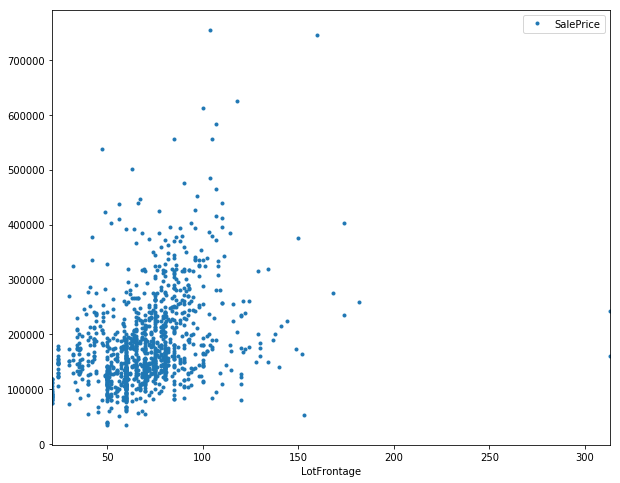

In [20]:
df_train.plot('LotFrontage', 'SalePrice', figsize=(10,8), style='.')

There seemes to be two outliers, let's investigate.

In [21]:
df_train[df_train['LotFrontage'] > 200]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Train/Test,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
934,2069,0,0,NaN,4,1Fam,TA,Gd,425.0,0.0,...,0,Pave,9,585.0,0.0,AllPub,0,1960,2007,2008
1298,4692,950,0,NaN,3,1Fam,TA,Gd,5644.0,0.0,...,0,Pave,12,6110.0,0.0,AllPub,214,2008,2008,2008


We can safetly eliminate these two datapoints.

**NOTE: GET RID OF OUTLIERS IN LOTFRONTAGE**

In [22]:
df_train = df_train.drop([934, 1298], axis=0)

In [23]:
print('Missing in train: ', df_train['LotFrontage'].isnull().sum())
print('Missing in test: ', df_test['LotFrontage'].isnull().sum())

Missing in train:  259
Missing in test:  227


**NOTE: FILL MISSING VALUES FOR 'LOTFRONTAGE' USING MEDIAN**

In [24]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
df_full = pd.concat([df_train, df_test]).reset_index(drop=True)
df_full["LotFrontage"] = df_full.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [25]:
df_train = df_full[df_full['Train/Test']==0].reset_index(drop=True)
df_test = df_full[df_full['Train/Test']==1].reset_index(drop=True)
print('Missing in train: ', df_train['MSZoning'].isnull().sum())
print('Missing in test: ', df_test['MSZoning'].isnull().sum())

Missing in train:  0
Missing in test:  0


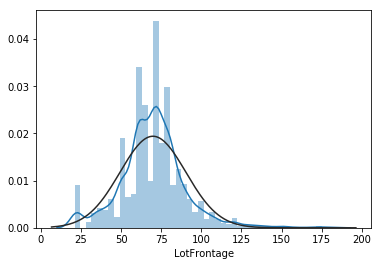

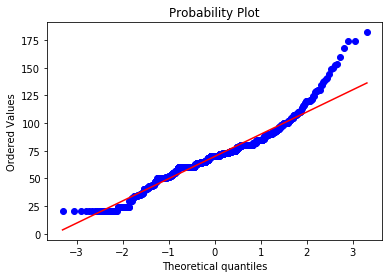

In [26]:
#histogram and normal probability plot
sns.distplot(df_train['LotFrontage'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['LotFrontage'], plot=plt)

In [27]:
#skewness and kurtosis
print("Skewness: %f" % df_train['LotFrontage'].skew())
print("Kurtosis: %f" % df_train['LotFrontage'].kurt())

Skewness: 0.663193
Kurtosis: 3.009097


It looks about right, we won't make any transformations.

<a name='3.4'></a>
## 3.4 LotArea
Lot size in square feet

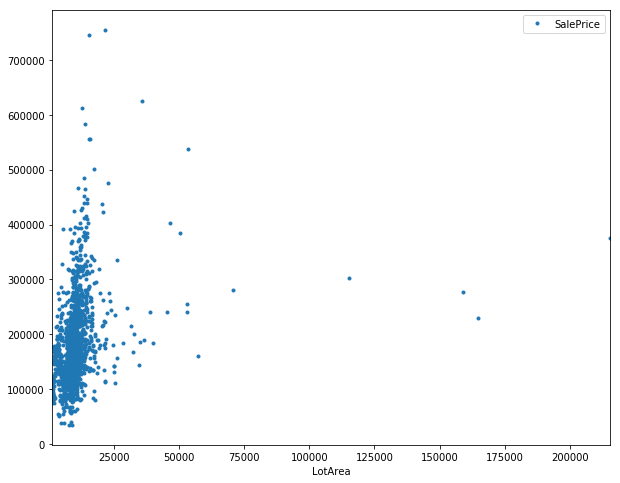

In [28]:
df_train.plot('LotArea', 'SalePrice', figsize=(10,8), style='.')

There are some datapoints with a lot area bigger than 100000. Let's change their values to a max of 100000.

**NOTE: TRUNCATE LOTAREA > 100000 TO 100K**

In [29]:
df_train[df_train['LotArea']>100000]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Train/Test,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
249,1444,700,0,NaN,4,1Fam,TA,Gd,697.0,0.0,...,0,Pave,7,1444.0,0.0,AllPub,0,1958,2006,2007
313,2036,0,0,NaN,3,1Fam,TA,Gd,1236.0,820.0,...,0,Pave,8,2136.0,0.0,AllPub,0,1965,1965,2009
335,1619,167,0,NaN,3,2fmCon,TA,Gd,1249.0,147.0,...,0,Grvl,7,1499.0,0.0,AllPub,670,1965,1965,2008
706,1824,0,0,NaN,2,1Fam,TA,Gd,1219.0,0.0,...,0,Pave,5,1643.0,0.0,AllPub,380,1971,2002,2007


In [30]:
df_train['LotArea'] = df_train['LotArea'].apply(lambda x: 100000 if x > 100000 else x)

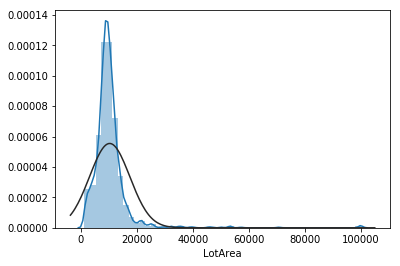

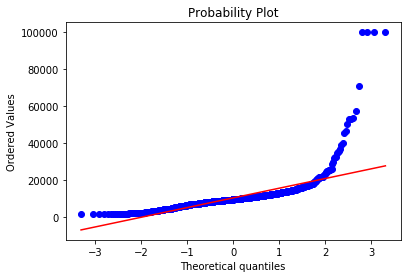

In [31]:
sns.distplot(df_train['LotArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['LotArea'], plot=plt)

In [32]:
print("Skewness: %f" % df_train['LotArea'].skew())
print("Kurtosis: %f" % df_train['LotArea'].kurt())

Skewness: 6.971600
Kurtosis: 73.686895


Apply log transform to correct skewness.

**NOTE: LOG TRANSFORM LOTAREA**

In [33]:
df_train['LotArea'] = np.log(df_train['LotArea'])

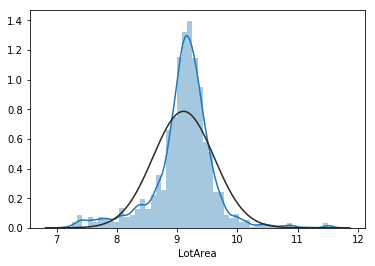

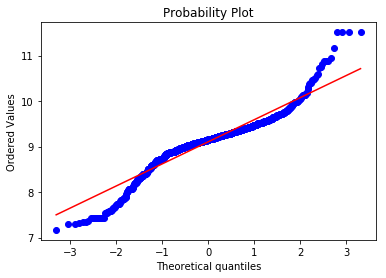

In [34]:
sns.distplot(df_train['LotArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['LotArea'], plot=plt)

In [35]:
print("Skewness: %f" % df_train['LotArea'].skew())
print("Kurtosis: %f" % df_train['LotArea'].kurt())

Skewness: -0.386922
Kurtosis: 3.626118


Much better!

In [36]:
print('Missing in train: ', df_train['LotArea'].isnull().sum())
print('Missing in test: ', df_test['LotArea'].isnull().sum())

Missing in train:  0
Missing in test:  0


<a name='3.5'></a>
## 3.5 Street

Type of road access to property

       Grvl	Gravel	
       Pave	Paved

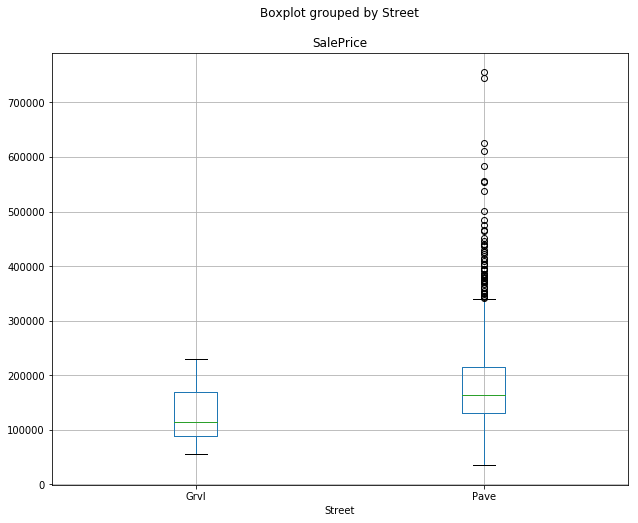

In [277]:
df_train.boxplot('SalePrice', 'Street', figsize=(10,8) )

In [278]:
df_train['Street'].value_counts()

Pave    1448
Grvl       6
Name: Street, dtype: int64

<a name='3.6'></a>
## 3.6 Alley

Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
       
Another categorical variable

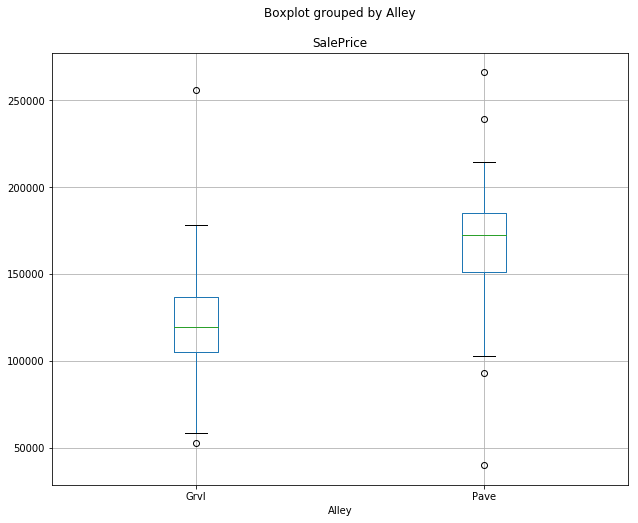

In [37]:
df_train.boxplot('SalePrice', 'Alley', figsize=(10,8) )

In [38]:
print('Missing in train: ', df_train['Alley'].isnull().sum())
print('Missing in test: ', df_test['Alley'].isnull().sum())

Missing in train:  1367
Missing in test:  1352


**NOTE: REPLACE NANs WITH NOALLEY**

In [39]:
df_train['Alley'] = df_train['Alley'].fillna("NoAlley")
df_test['Alley'] = df_test['Alley'].fillna("NoAlley")
print('Missing in train: ', df_train['Alley'].isnull().sum())
print('Missing in test: ', df_test['Alley'].isnull().sum())

Missing in train:  0
Missing in test:  0


<a name='3.7'></a>
## 3.7 LotShape

LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

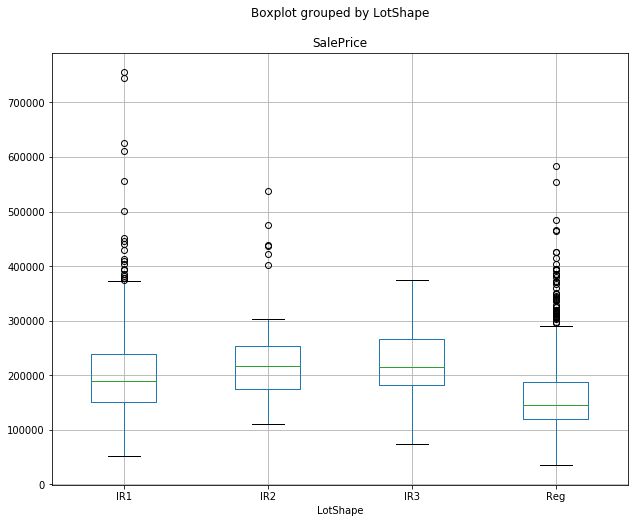

In [40]:
df_train.boxplot('SalePrice', 'LotShape', figsize=(10,8) )

In [41]:
print('Missing in train: ', df_train['LotShape'].isnull().sum())
print('Missing in test: ', df_test['LotShape'].isnull().sum())

Missing in train:  0
Missing in test:  0


No missing entries.

<a name='3.8'></a>
## 3.8 LandContour

Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

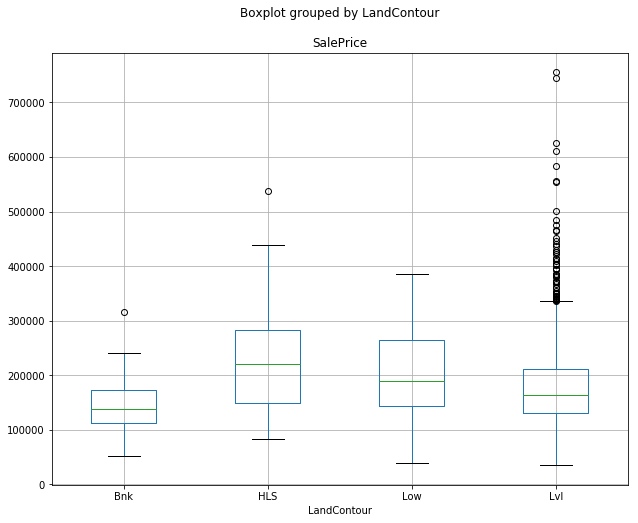

In [42]:
df_train.boxplot('SalePrice', 'LandContour', figsize=(10,8))

In [43]:
print('Missing in train: ', df_train['LandContour'].isnull().sum())
print('Missing in test: ', df_test['LandContour'].isnull().sum())

Missing in train:  0
Missing in test:  0


<a name='3.9'></a>
## 3.9 Utilities

Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only

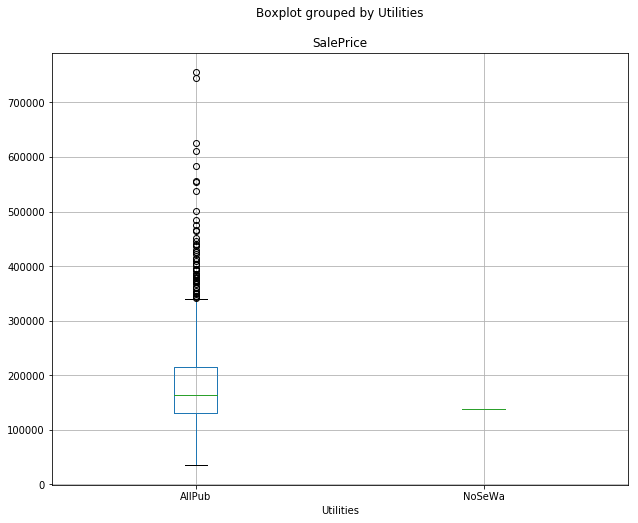

In [44]:
df_train.boxplot('SalePrice', 'Utilities', figsize=(10,8))

There are only two options in the training set

In [45]:
print('Unique values in train: ', df_train['Utilities'].unique())
print('Unique values in test: ', df_test['Utilities'].unique())

Unique values in train:  ['AllPub' 'NoSeWa']
Unique values in test:  ['AllPub' nan]


**NOTE: IGNORING UTILITIES SINCE ALL RECORDS ARE "ALLPUB" AND ONE "NoSeWa"** 

In [46]:
df_train = df_train.drop(['Utilities'], axis=1)
df_test = df_test.drop(['Utilities'], axis=1)

<a name='3.10'></a>
## 3.10 LotConfig

Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

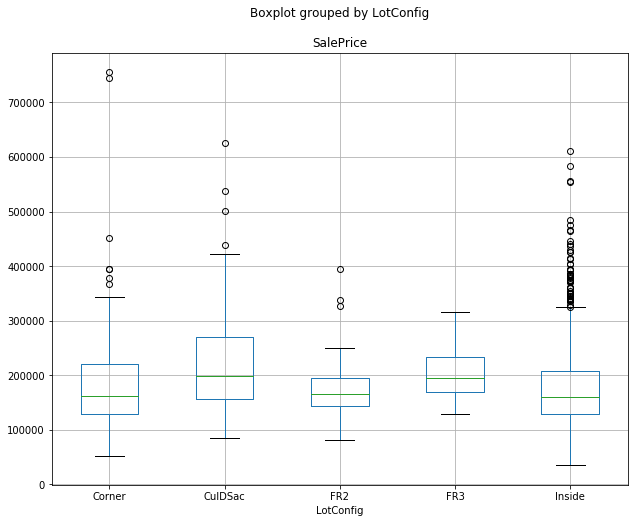

In [47]:
df_train.boxplot('SalePrice', 'LotConfig', figsize=(10,8))

In [48]:
print('Missing in train: ', df_train['LotConfig'].isnull().sum())
print('Missing in test: ', df_test['LotConfig'].isnull().sum())

Missing in train:  0
Missing in test:  0


<a name='3.11'></a>
## 3.11 LandSlope

Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

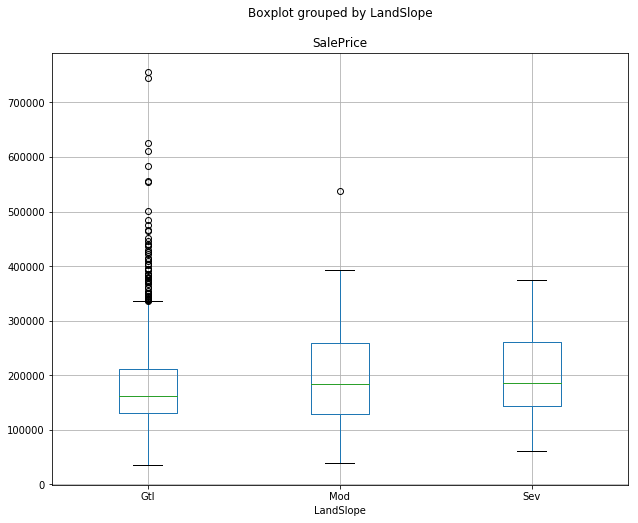

In [49]:
df_train.boxplot('SalePrice', 'LandSlope', figsize=(10,8))

In [50]:
print('Missing in train: ', df_train['LandSlope'].isnull().sum())
print('Missing in test: ', df_test['LandSlope'].isnull().sum())

Missing in train:  0
Missing in test:  0


In [51]:
print('Unique values in train: ', df_train['LandSlope'].unique())
print('Unique values in test: ', df_test['LandSlope'].unique())

Unique values in train:  ['Gtl' 'Mod' 'Sev']
Unique values in test:  ['Gtl' 'Mod' 'Sev']


In [52]:
df_train['LandSlope'].value_counts()

Gtl    1381
Mod      64
Sev      13
Name: LandSlope, dtype: int64

In [53]:
df_test['LandSlope'].value_counts()

Gtl    1396
Mod      60
Sev       3
Name: LandSlope, dtype: int64

There seem to be only 13 "Sev" records on the train set and 3 on the test set. We can combine "Mod" and "Sev" to reduce number of features.

**NOTE: CHANGE SEV RECORDS TO MOD IN "LANDSLOPE"**

In [54]:
df_train['LandSlope'] = df_train['LandSlope'].apply(lambda x:'Mod' if x in ['Mod', 'Sev'] else 'Gtl')
df_train['LandSlope'].value_counts()

Gtl    1381
Mod      77
Name: LandSlope, dtype: int64

<a name='3.12'></a>
## 3.12 Neighborhood

Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
       

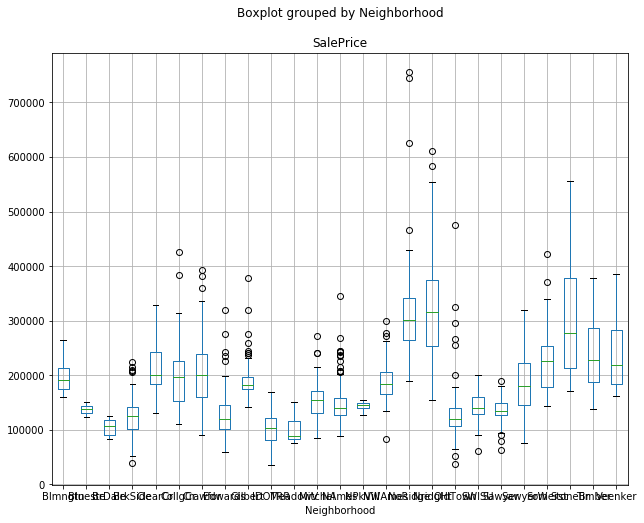

In [55]:
df_train.boxplot('SalePrice', 'Neighborhood', figsize=(10,8))

In [56]:
print('Missing in train: ', df_train['Neighborhood'].isnull().sum())
print('Missing in test: ', df_test['Neighborhood'].isnull().sum())

Missing in train:  0
Missing in test:  0


In [57]:
print('Unique values in train: ', len(df_train['Neighborhood'].unique()))
print('Unique values in test: ', len(df_test['Neighborhood'].unique()))

Unique values in train:  25
Unique values in test:  25


<a name='3.13'></a>
## 3.13 Condition1

Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

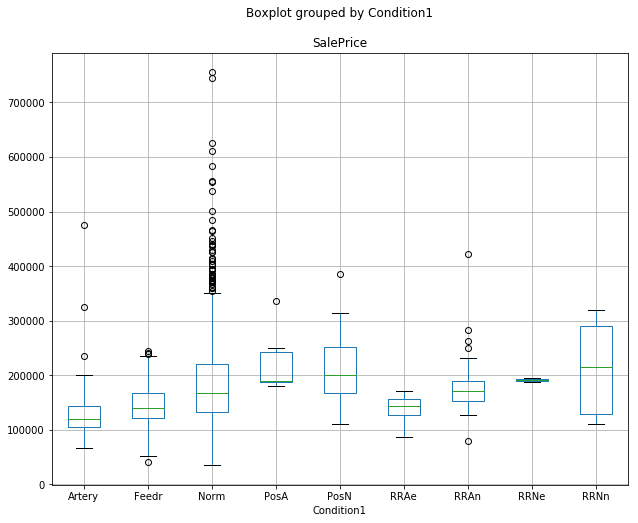

In [58]:
df_train.boxplot('SalePrice', 'Condition1', figsize=(10,8))

In [59]:
print('Missing in train: ', df_train['Condition1'].isnull().sum())
print('Missing in test: ', df_test['Condition1'].isnull().sum())

Missing in train:  0
Missing in test:  0


In [60]:
print('Unique values in train: ', len(df_train['Condition1'].unique()))
print('Unique values in test: ', len(df_test['Condition1'].unique()))

Unique values in train:  9
Unique values in test:  9


In [61]:
df_train['Condition1'].value_counts()

Norm      1260
Feedr       80
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         7
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [62]:
df_test['Condition1'].value_counts()

Norm      1251
Feedr       83
Artery      44
RRAn        24
PosN        20
RRAe        17
PosA        12
RRNe         4
RRNn         4
Name: Condition1, dtype: int64

**NOTE 12: COMPACT 'CONDITION1' TO HAVE ONLY 6 VARIABLES**

In [63]:
df_train['Condition1'] = df_train['Condition1'].apply(lambda x:'RRNe' if x in ['RRAe']
                                                     else ('PosN' if x in ['PosA'] 
                                                        else ('RRNn' if x in ['RRAn'] else x)
                                                          ))

<a name='3.14'></a>
## 3.14 Condition2

Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

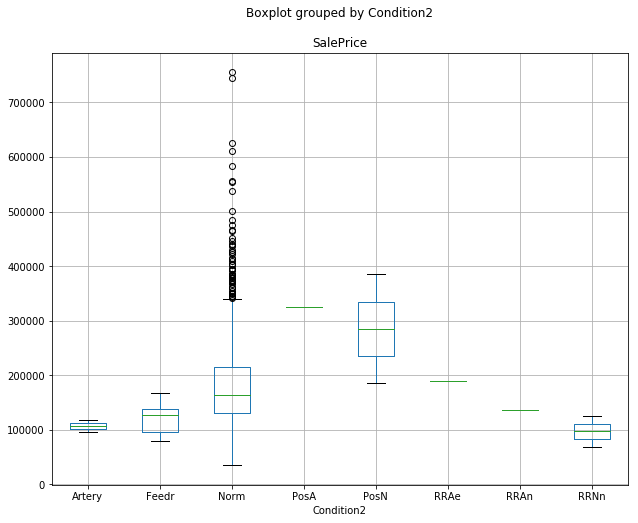

In [64]:
df_train.boxplot('SalePrice', 'Condition2', figsize=(10,8))

In [65]:
print('Missing in train: ', df_train['Condition2'].isnull().sum())
print('Missing in test: ', df_test['Condition2'].isnull().sum())

Missing in train:  0
Missing in test:  0


In [66]:
print('Unique values in train: ', len(df_train['Condition2'].unique()))
print('Unique values in test: ', len(df_test['Condition2'].unique()))

Unique values in train:  8
Unique values in test:  5


There are 3 observations in Condition2 not present in the test set.

In [67]:
print('Not in test: ', list(set(df_train['Condition2']) - set(df_test['Condition2'])))

Not in test:  ['RRNn', 'RRAe', 'RRAn']


**NOTE: DROP VARIABLES WHEN USING HOT-ENCODING AND VARIABLES WITH SINGLE OBSERVATIONS**

<a name='3.15'></a>
## 3.15 BldgType

Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

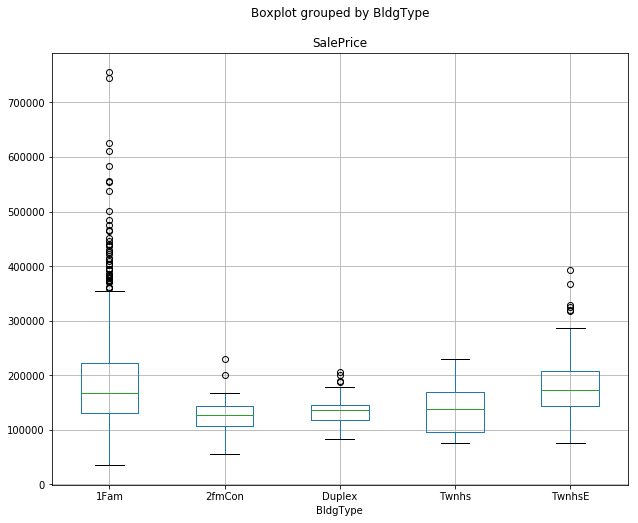

In [68]:
df_train.boxplot('SalePrice', 'BldgType', figsize=(10,8))

In [69]:
print('Missing in train: ', df_train['BldgType'].isnull().sum())
print('Missing in test: ', df_test['BldgType'].isnull().sum())

Missing in train:  0
Missing in test:  0


In [70]:
print('Unique values in train: ', len(df_train['BldgType'].unique()))
print('Unique values in test: ', len(df_test['BldgType'].unique()))

Unique values in train:  5
Unique values in test:  5


<a name='3.16'></a>
## 3.16 HouseStyle

Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

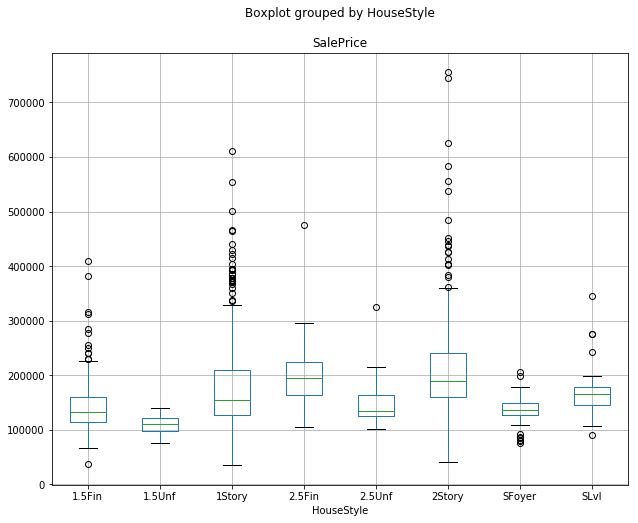

In [71]:
df_train.boxplot('SalePrice', 'HouseStyle', figsize=(10,8))

In [72]:
print('Missing in train: ', df_train['HouseStyle'].isnull().sum())
print('Missing in test: ', df_test['HouseStyle'].isnull().sum())

Missing in train:  0
Missing in test:  0


In [73]:
print('Unique values in train: ', len(df_train['HouseStyle'].unique()))
print('Unique values in test: ', len(df_test['HouseStyle'].unique()))

Unique values in train:  8
Unique values in test:  7


There is one extra variable in the train set not present in the test set:

In [74]:
print('Value missing in test set: ', list(set(df_train['HouseStyle'])-set(df_test['HouseStyle'])))

Value missing in test set:  ['2.5Fin']


**NOTE: DROP THE VALUE WHEN USING HOT-ENCODING**

<a name='3.17'></a>
## 3.17 OverallQual

Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

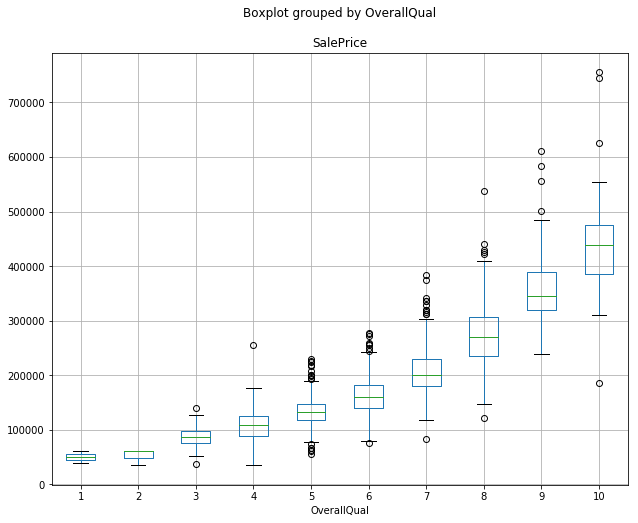

In [75]:
df_train.boxplot('SalePrice', 'OverallQual', figsize=(10,8))

The box plot shows how sales prices increase with the overall quality, as one would expect.

In [76]:
print('Missing in train: ', df_train['OverallQual'].isnull().sum())
print('Missing in test: ', df_test['OverallQual'].isnull().sum())

Missing in train:  0
Missing in test:  0


In [77]:
print('Unique values in train: ', len(df_train['OverallQual'].unique()))
print('Unique values in test: ', len(df_test['OverallQual'].unique()))

Unique values in train:  10
Unique values in test:  10


**NOTE: COMBINE DIFFERENT OVERALLQUAL AND CHECK FOR HIGHER CORRELATION WITH TARGET**

<a name='3.18'></a>
## 3.18 OverallCond

Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

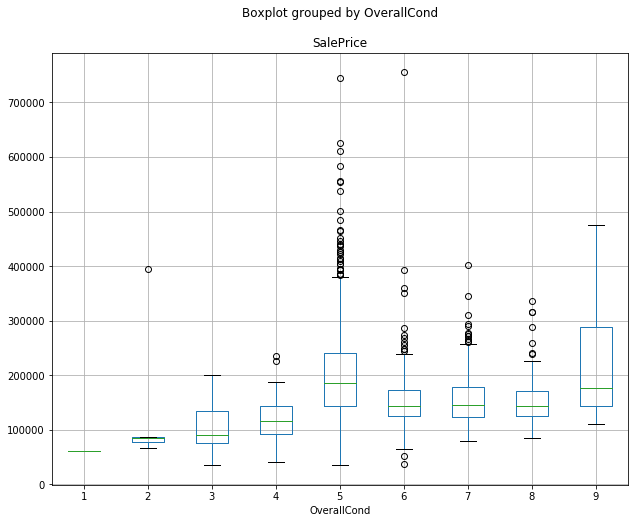

In [78]:
df_train.boxplot('SalePrice', 'OverallCond', figsize=(10,8))

In [79]:
print('Missing in train: ', df_train['OverallCond'].isnull().sum())
print('Missing in test: ', df_test['OverallCond'].isnull().sum())

Missing in train:  0
Missing in test:  0


In [80]:
df_train['OverallCond'].value_counts()

5    820
6    252
7    204
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

In [81]:
df_test['OverallCond'].value_counts()

5    824
6    279
7    185
8     72
4     44
3     25
9     19
1      6
2      5
Name: OverallCond, dtype: int64

**NOTE: DROP FEATURE, OVERALLCOND DOESN'T SEEM TO HELP WITH THE TARGET PREDICTION**

<a name='3.19'></a>
## 3.19 YearBuilt
Original construction date

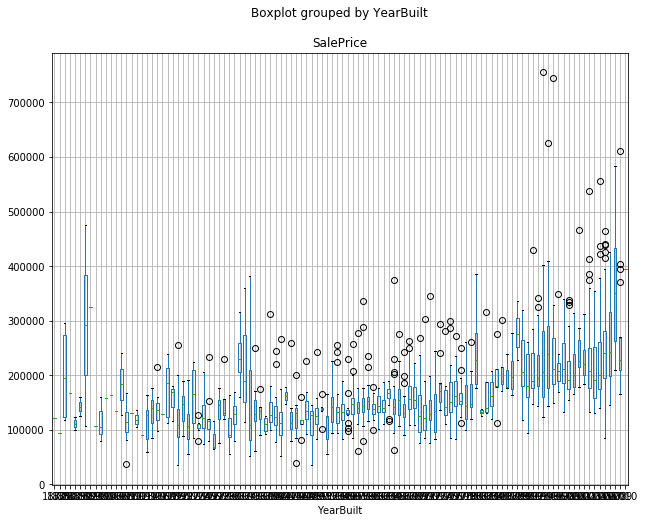

In [275]:
df_train.boxplot('SalePrice', 'YearBuilt', figsize=(10,8))

It doesn't seem like the year at which the houses were built help to predict the price. We can maybe use it later for the feature engineering part.

In [83]:
print('Missing in train: ', df_train['OverallQual'].isnull().sum())
print('Missing in test: ', df_test['OverallQual'].isnull().sum())

Missing in train:  0
Missing in test:  0


<a name='3.20'></a>
## 3.20 YearRemodAdd

Remodel date (same as construction date if no remodeling or additions)

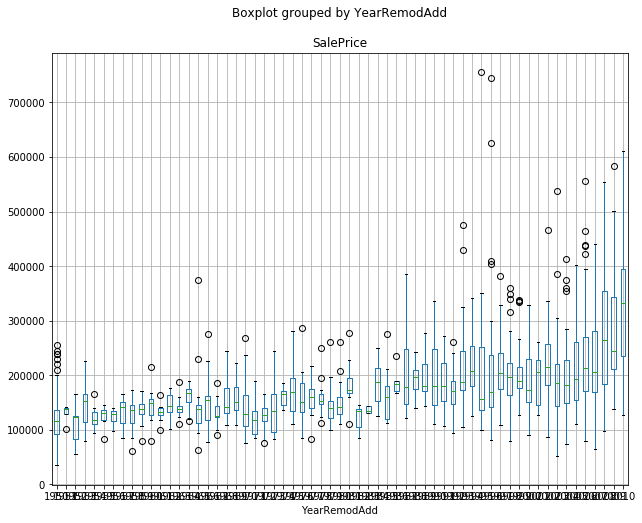

In [84]:
df_train.boxplot('SalePrice', 'YearRemodAdd', figsize=(10,8))

In [85]:
print('Missing in train: ', df_train['YearRemodAdd'].isnull().sum())
print('Missing in test: ', df_test['YearRemodAdd'].isnull().sum())

Missing in train:  0
Missing in test:  0


Same as before, we can leave it as is for future feature eng.

<a name='3.21'></a>
## 3.21 RoofStyle

Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed

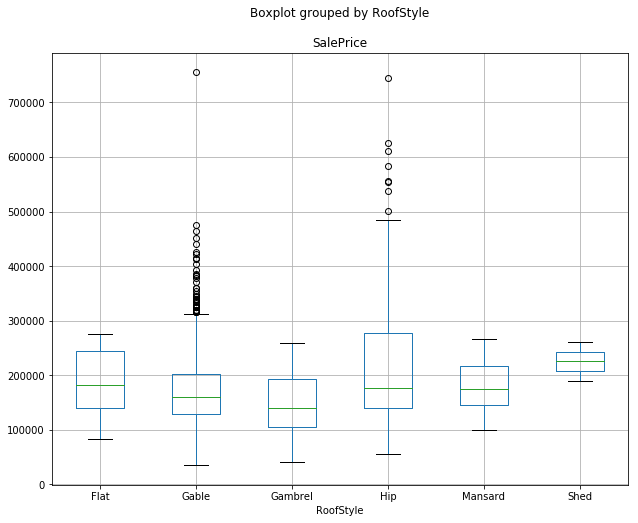

In [86]:
df_train.boxplot('SalePrice', 'RoofStyle', figsize=(10,8))

In [87]:
print('Missing in train: ', df_train['RoofStyle'].isnull().sum())
print('Missing in test: ', df_test['RoofStyle'].isnull().sum())

Missing in train:  0
Missing in test:  0


In [88]:
print('Unique values in train: ', len(df_train['RoofStyle'].unique()))
print('Unique values in test: ', len(df_test['RoofStyle'].unique()))

Unique values in train:  6
Unique values in test:  6


<a name='3.22'></a>
## 3.22 RoofMatl

Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

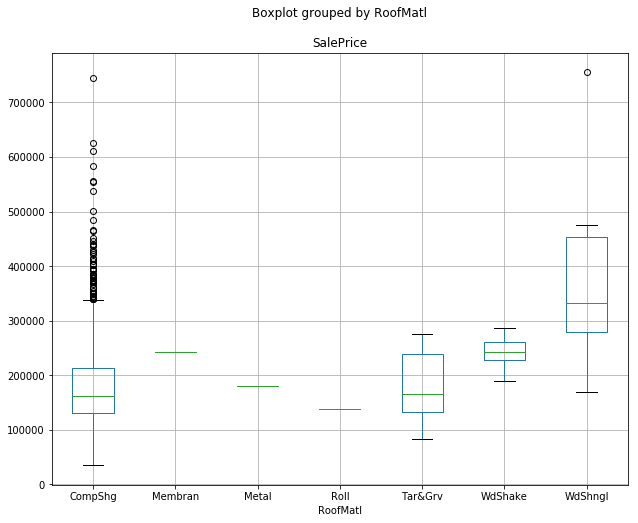

In [89]:
df_train.boxplot('SalePrice', 'RoofMatl', figsize=(10,8))

In [90]:
print('Missing in train: ', df_train['RoofMatl'].isnull().sum())
print('Missing in test: ', df_test['RoofMatl'].isnull().sum())

Missing in train:  0
Missing in test:  0


In [91]:
print('Unique values in train: ', len(df_train['RoofMatl'].unique()))
print('Unique values in test: ', len(df_test['RoofMatl'].unique()))

Unique values in train:  7
Unique values in test:  4


In [92]:
print('Values missing in test set: ', list(set(df_train['RoofMatl'])-set(df_test['RoofMatl'])))

Values missing in test set:  ['Metal', 'Roll', 'Membran']


**NOTE: REMOVE THOSE MISSING VARIABLES WHEN USING HOT-ENCODING**

<a name='3.23'></a>
## 3.23 Exterior1st

Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

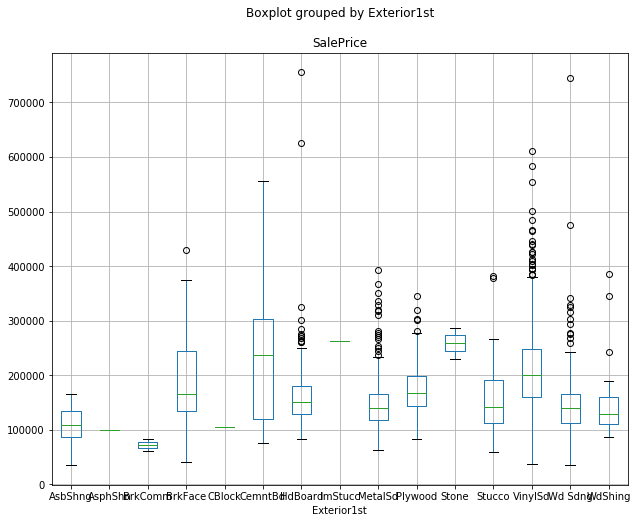

In [93]:
df_train.boxplot('SalePrice', 'Exterior1st', figsize=(10,8))

There are some single observations. We'll have to take care of them.

In [94]:
print('Missing in train: ', df_train['Exterior1st'].isnull().sum())
print('Missing in test: ', df_test['Exterior1st'].isnull().sum())

Missing in train:  0
Missing in test:  1


In [95]:
print('Unique values in train: ', len(df_train['Exterior1st'].unique()))
print('Unique values in test: ', len(df_test['Exterior1st'].unique()))

Unique values in train:  15
Unique values in test:  14


In [96]:
print('Value missing in test set: ', list(set(df_train['Exterior1st'])-set(df_test['Exterior1st'])))

Value missing in test set:  ['ImStucc', 'Stone']


In [97]:
df_train['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    205
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      24
AsbShng     20
Stone        2
BrkComm      2
CBlock       1
ImStucc      1
AsphShn      1
Name: Exterior1st, dtype: int64

In [98]:
df_test['Exterior1st'].value_counts()

VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64

**NOTE: REMOVE THE FOLLOWING FROM THE HOT-ENCODING: ['Stone', 'BrkComm', 'ImStucc', 'CBlock', 'AsphShn']**

<a name='3.24'></a>
## 3.24 Exterior2nd

Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

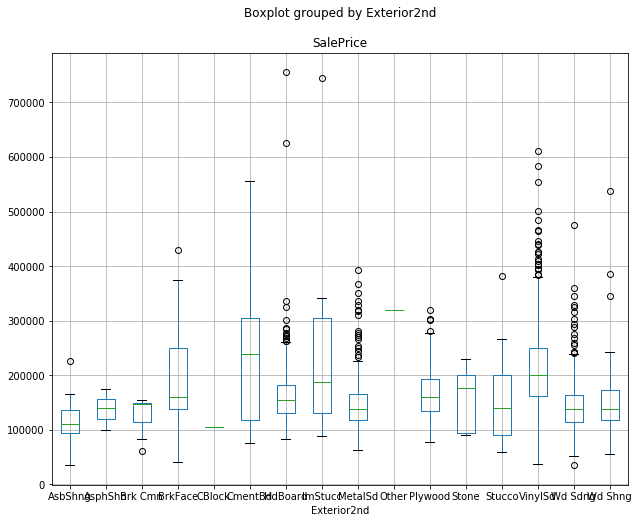

In [99]:
df_train.boxplot('SalePrice', 'Exterior2nd', figsize=(10,8))

In [100]:
print('Missing in train: ', df_train['Exterior2nd'].isnull().sum())
print('Missing in test: ', df_test['Exterior2nd'].isnull().sum())

Missing in train:  0
Missing in test:  1


In [101]:
print('Value missing in test set: ', list(set(df_train['Exterior2nd'])-set(df_test['Exterior2nd'])))

Value missing in test set:  ['Other']


In [102]:
df_train['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    196
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      25
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

In [103]:
df_test['Exterior2nd'].value_counts()

VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
AsphShn      1
Stone        1
Name: Exterior2nd, dtype: int64

**NOTE: REMOVE ['Other'.'CBlock','AsphShn','Stone','Brk Cmn'] FROM HOT-ENCODING**

<a name='3.25'></a>
## 3.25 MasVnrType

Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

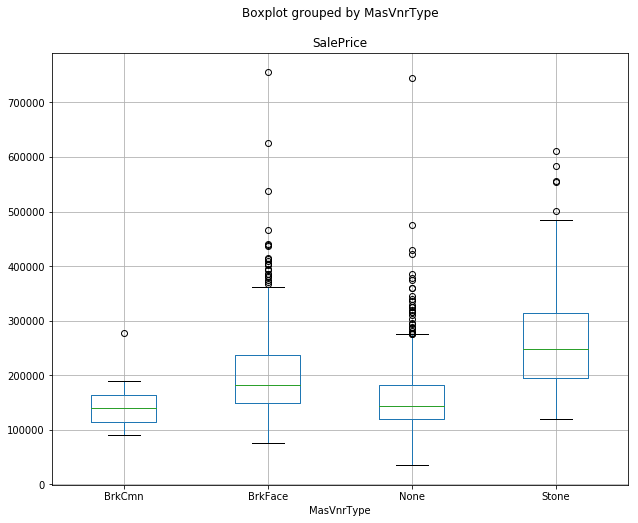

In [104]:
df_train.boxplot('SalePrice', 'MasVnrType', figsize=(10,8))

In [105]:
print('Missing in train: ', df_train['MasVnrType'].isnull().sum())
print('Missing in test: ', df_test['MasVnrType'].isnull().sum())

Missing in train:  8
Missing in test:  16


In [106]:
print('Unique values in train: ', len(df_train['MasVnrType'].unique()))
print('Unique values in test: ', len(df_test['MasVnrType'].unique()))

Unique values in train:  5
Unique values in test:  5


**NOTE: DROP 'MasVnrType' SINCE IT DOESN'T SEEM TO GIVE MUCH INFORMATION AND ADDS MANY MORE FEATURES TO THE MODEL**

In [107]:
df_train = df_train.drop(['MasVnrType'], axis=1)
df_test = df_test.drop(['MasVnrType'], axis=1)

<a name='3.26'></a>
## 3.26 MasVnrArea
Masonry veneer area in square feet

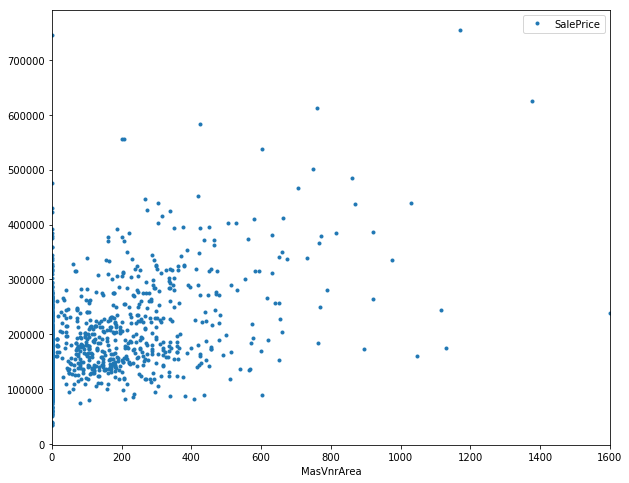

In [108]:
df_train.plot('MasVnrArea', 'SalePrice', figsize=(10,8), style='.')

In [109]:
print('Missing in train: ', df_train['MasVnrArea'].isnull().sum())
print('Missing in test: ', df_test['MasVnrArea'].isnull().sum())

Missing in train:  8
Missing in test:  15


In [110]:
corr_matrix = df_train.corr()['MasVnrArea'].sort_values(ascending=False)[:10]
print('Top 10 correlated features: \n', corr_matrix)

Top 10 correlated features: 
 MasVnrArea     1.000000
SalePrice      0.481079
OverallQual    0.407966
GrLivArea      0.380828
GarageArea     0.365831
GarageCars     0.365412
TotalBsmtSF    0.351490
1stFlrSF       0.333392
YearBuilt      0.314140
FullBath       0.276599
Name: MasVnrArea, dtype: float64


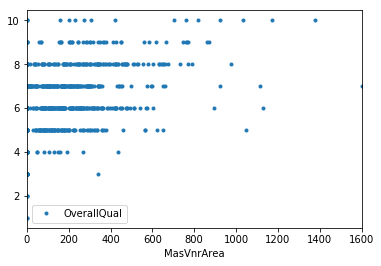

In [111]:
df_train.plot('MasVnrArea', 'OverallQual', style='.')

**NOTE: USE 'OverallQual' TO IMPUTE VALUES IN 'MasVnrArea'**

In [112]:
df_full = pd.concat([df_train, df_test]).reset_index(drop=True)
df_full["MasVnrArea"] = df_full.groupby("OverallQual")["MasVnrArea"].apply(lambda x: x.fillna(x.median()))

In [113]:
df_train = df_full[df_full['Train/Test']==0].reset_index(drop=True)
df_test = df_full[df_full['Train/Test']==1].reset_index(drop=True)
print('Missing in train: ', df_train['MasVnrArea'].isnull().sum())
print('Missing in test: ', df_test['MasVnrArea'].isnull().sum())

Missing in train:  0
Missing in test:  0


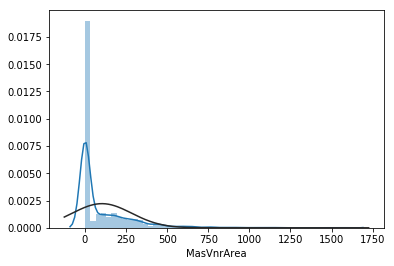

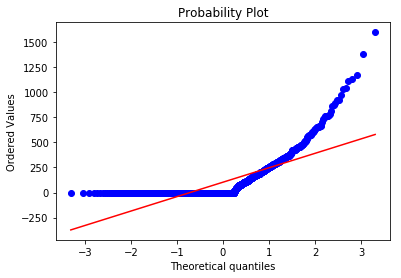

In [114]:
#histogram and normal probability plot
sns.distplot(df_train['MasVnrArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['MasVnrArea'], plot=plt)

In [115]:
print("Skewness: %f" % df_train['MasVnrArea'].skew())
print("Kurtosis: %f" % df_train['MasVnrArea'].kurt())

Skewness: 2.673846
Kurtosis: 10.188676


**NOTE: WE CAN KEEP IT FOR NON LINEAR MODELS (LIKE RANDOM FORESTS) BUT DUE TO THE HIGH AMOUNT OF 0s, NO TRANSFORMATIONS WOULD HELP**

<a name='3.27'></a>
## 3.27 ExterQual

Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

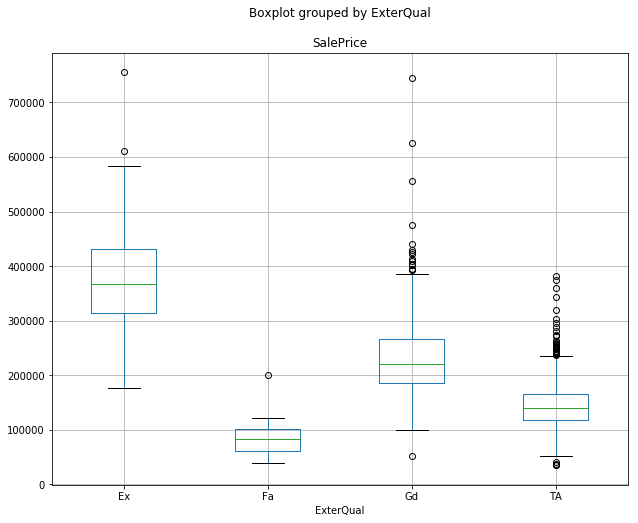

In [116]:
df_train.boxplot('SalePrice', 'ExterQual', figsize=(10,8))

In [117]:
print('Missing in train: ', df_train['ExterQual'].isnull().sum())
print('Missing in test: ', df_test['ExterQual'].isnull().sum())

Missing in train:  0
Missing in test:  0


In [118]:
print('Unique values in train: ', len(df_train['ExterQual'].unique()))
print('Unique values in test: ', len(df_test['ExterQual'].unique()))

Unique values in train:  4
Unique values in test:  4


Something to note, the 'Poor' variable doesn't appear on either set

<a name='3.28'></a>
## 3.28 ExterCond

Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

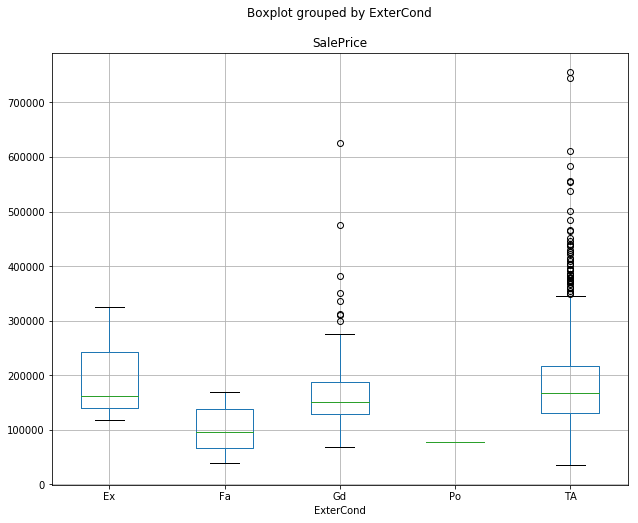

In [119]:
df_train.boxplot('SalePrice', 'ExterCond', figsize=(10,8))

In [120]:
print('Missing in train: ', df_train['ExterCond'].isnull().sum())
print('Missing in test: ', df_test['ExterCond'].isnull().sum())

Missing in train:  0
Missing in test:  0


In [121]:
print('Unique values in train: ', len(df_train['ExterCond'].unique()))
print('Unique values in test: ', len(df_test['ExterCond'].unique()))

Unique values in train:  5
Unique values in test:  5


In [122]:
print('Counts in test set: ', df_test['ExterCond'].value_counts())

Counts in test set:  TA    1256
Gd     153
Fa      39
Ex       9
Po       2
Name: ExterCond, dtype: int64


**NOTE: COMBINE 'Po' AND 'Fa' FEATURES INTO ONE & 'Ex' and 'Gd' into another**

In [123]:
df_train['ExterCond'] = df_train['ExterCond'].apply(lambda x:'Fa' if x in ['Po', 'Fa'] else x)
df_train['ExterCond'] = df_train['ExterCond'].apply(lambda x:'Ex' if x in ['Ex', 'Gd'] else x)
df_test['ExterCond'] = df_test['ExterCond'].apply(lambda x:'Fa' if x in ['Po', 'Fa'] else x)
df_test['ExterCond'] = df_test['ExterCond'].apply(lambda x:'Ex' if x in ['Ex', 'Gd'] else x)
df_train['ExterCond'].value_counts()

TA    1280
Ex     149
Fa      29
Name: ExterCond, dtype: int64

<a name='3.29'></a>
## 3.29 Foundation

Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

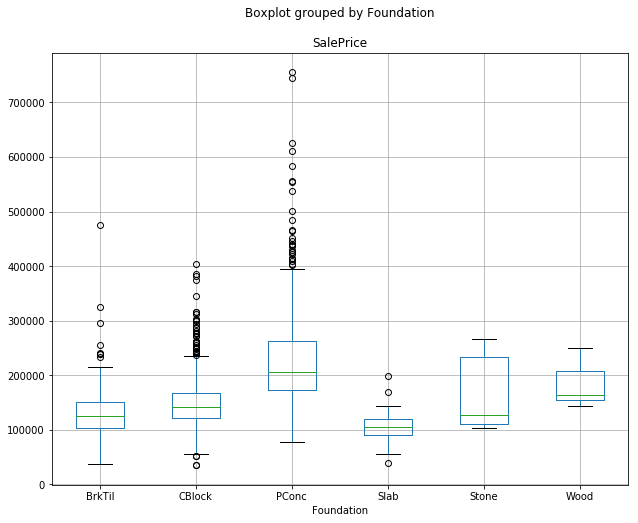

In [124]:
df_train.boxplot('SalePrice', 'Foundation', figsize=(10,8))

In [125]:
print('Missing in train: ', df_train['Foundation'].isnull().sum())
print('Missing in test: ', df_test['Foundation'].isnull().sum())

Missing in train:  0
Missing in test:  0


In [126]:
print('Unique values in train: ', len(df_train['Foundation'].unique()))
print('Unique values in test: ', len(df_test['Foundation'].unique()))

Unique values in train:  6
Unique values in test:  6


Looks good.

<a name='3.30'></a>
## 3.30 Basement features

There are 9 features related to basements. Let's look at all of them together to impute values and select the most important ones

In [127]:
bsmt_feat = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']
for feat in bsmt_feat:
    print(feat)
    print('Missing in train: ', df_train[feat].isnull().sum())
    print('Missing in test: ', df_test[feat].isnull().sum())

BsmtQual
Missing in train:  37
Missing in test:  44
BsmtCond
Missing in train:  37
Missing in test:  45
BsmtExposure
Missing in train:  38
Missing in test:  44
BsmtFinType1
Missing in train:  37
Missing in test:  42
BsmtFinSF1
Missing in train:  0
Missing in test:  1
BsmtFinType2
Missing in train:  38
Missing in test:  42
BsmtFinSF2
Missing in train:  0
Missing in test:  1
BsmtUnfSF
Missing in train:  0
Missing in test:  1
TotalBsmtSF
Missing in train:  0
Missing in test:  1


We can impute some values using the square feet measurements:

**NOTE: IMPUTE BSMT FEATURES**

In [128]:
def impute_bsmt_feat(df):
    mask = (df['TotalBsmtSF']==0)
    df.loc[df['BsmtQual'].isnull() & mask, 'BsmtQual'] = 'NoBsmt'
    df.loc[df['BsmtCond'].isnull() & mask, 'BsmtCond'] = 'NoBsmt'
    df.loc[df['BsmtExposure'].isnull() & mask, 'BsmtExposure'] = 'NoBsmt'

    df.loc[df['BsmtFinType1'].isnull() & (df['BsmtFinSF1']==0), 'BsmtFinType1'] = 'NoBsmt'
    df.loc[df['BsmtFinType2'].isnull() & (df['BsmtFinSF2']==0), 'BsmtFinType2'] = 'NoBsmt'
    
    df.loc[df['BsmtFinType1'].isnull() & (df['BsmtUnfSF']>0), 'BsmtFinType1'] = 'Unf'
    df.loc[df['BsmtFinType2'].isnull() & (df['BsmtUnfSF']>0), 'BsmtFinType2'] = 'Unf'
    return df

df_train = impute_bsmt_feat(df_train)
df_test = impute_bsmt_feat(df_test)

In [129]:
bsmt_feat = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']
for feat in bsmt_feat:
    print(feat)
    print('Missing in train: ', df_train[feat].isnull().sum())
    print('Missing in test: ', df_test[feat].isnull().sum())

BsmtQual
Missing in train:  0
Missing in test:  3
BsmtCond
Missing in train:  0
Missing in test:  4
BsmtExposure
Missing in train:  1
Missing in test:  3
BsmtFinType1
Missing in train:  0
Missing in test:  1
BsmtFinSF1
Missing in train:  0
Missing in test:  1
BsmtFinType2
Missing in train:  0
Missing in test:  1
BsmtFinSF2
Missing in train:  0
Missing in test:  1
BsmtUnfSF
Missing in train:  0
Missing in test:  1
TotalBsmtSF
Missing in train:  0
Missing in test:  1


Checking the missing values in the test set:

In [130]:
print(df_test[df_test['BsmtFinSF1'].isnull()].index.tolist())
print(df_test[df_test['BsmtFinSF2'].isnull()].index.tolist())
print(df_test[df_test['BsmtFinType1'].isnull()].index.tolist())
print(df_test[df_test['BsmtFinType2'].isnull()].index.tolist())
print(df_test[df_test['BsmtUnfSF'].isnull()].index.tolist())
print(df_test[df_test['TotalBsmtSF'].isnull()].index.tolist())

[660]
[660]
[660]
[660]
[660]
[660]


Since they all correspond to the same house, let's impute it using a high correlated variable with 'TotalBsmtSF'

In [131]:
df_train.corr()['TotalBsmtSF'].sort_values(ascending=False)[:5]

TotalBsmtSF    1.000000
1stFlrSF       0.811182
SalePrice      0.646750
OverallQual    0.543010
GarageArea     0.477352
Name: TotalBsmtSF, dtype: float64

Let's impute those values using the most frequent values (median) grouping by '1stFLrSF'

**NOTE: IMPUTE NUMERICAL MISSING ONES WITH MEDIAN OF '1stFlrSf'**

In [132]:
df_test["BsmtFinSF1"].fillna(df_train.groupby("1stFlrSF")["BsmtFinSF1"].median() , inplace=True)
df_test["BsmtFinSF2"].fillna(df_train.groupby("1stFlrSF")["BsmtFinSF2"].median() , inplace=True)
df_test["BsmtUnfSF"].fillna(df_train.groupby("1stFlrSF")["BsmtUnfSF"].median() , inplace=True)
df_test["TotalBsmtSF"].fillna(df_train.groupby("1stFlrSF")["TotalBsmtSF"].median() , inplace=True)

Impute the rest of mising values with the modes.

**NOTE: CATEGORICAL MISSING ONES WITH MODE OF TRAIN SET**

In [133]:
df_test["BsmtQual"].fillna(df_train["BsmtQual"].mode().iloc[0] , inplace=True)
df_test["BsmtCond"].fillna(df_train["BsmtCond"].mode().iloc[0] , inplace=True)
df_train["BsmtExposure"].fillna(df_train["BsmtExposure"].mode().iloc[0] , inplace=True)
df_test["BsmtExposure"].fillna(df_train["BsmtExposure"].mode().iloc[0] , inplace=True)
df_test["BsmtFinType1"].fillna(df_train["BsmtFinType1"].mode().iloc[0] , inplace=True)
df_test["BsmtFinType2"].fillna(df_train["BsmtFinType2"].mode().iloc[0] , inplace=True)

**NOTE: NUMERICAL FEATS SHOULD BE TRANSFORMED**

<a name='3.31'></a>
## 3.31 Heating

Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

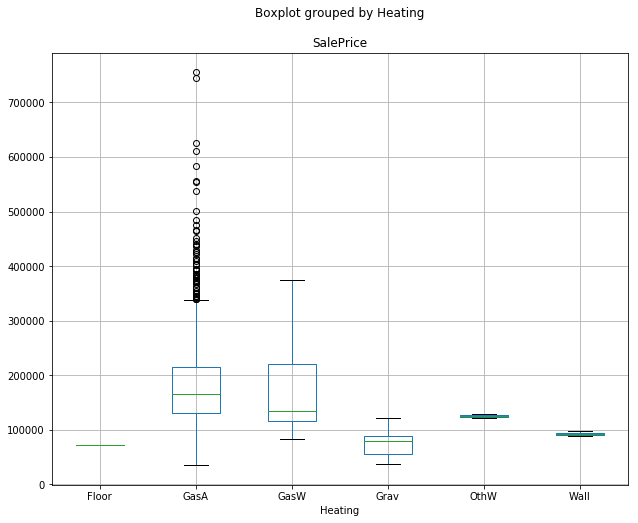

In [135]:
df_train.boxplot('SalePrice', 'Heating', figsize=(10,8))

In [136]:
print('Missing in train: ', df_train['Heating'].isnull().sum())
print('Missing in test: ', df_test['Heating'].isnull().sum())

Missing in train:  0
Missing in test:  0


In [137]:
df_train['Heating'].value_counts()

GasA     1426
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [138]:
df_test['Heating'].value_counts()

GasA    1446
GasW       9
Wall       2
Grav       2
Name: Heating, dtype: int64

In [139]:
print('Value missing in test set: ', list(set(df_train['Heating'])-set(df_test['Heating'])))

Value missing in test set:  ['OthW', 'Floor']


There are two more variables for Heating that don't appear on the test set. We should get rid of them.

**NOTE: DROP COLUMNS FOR THE HOT-ENCODING OF 'Floor' AND 'OthW'**

<a name='3.32'></a>
## 3.32 HeatingQC

Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

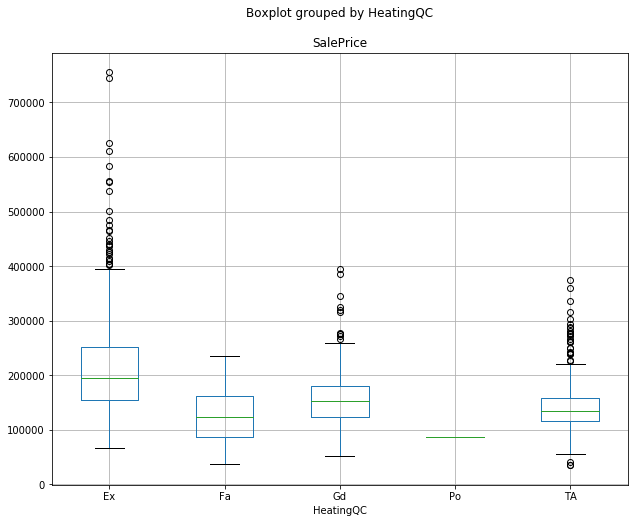

In [140]:
df_train.boxplot('SalePrice', 'HeatingQC', figsize=(10,8))

In [141]:
print('Missing in train: ', df_train['Heating'].isnull().sum())
print('Missing in test: ', df_test['Heating'].isnull().sum())

Missing in train:  0
Missing in test:  0


In [142]:
df_train['HeatingQC'].value_counts()

Ex    739
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [143]:
print('Value missing in test set: ', list(set(df_train['HeatingQC'])-set(df_test['HeatingQC'])))

Value missing in test set:  []


**NOTE: COMBINE 'Po' WITH 'Fa' SINCE THERE ARE NOT ENOUGH OBSERVATIONS TO LEARN FROM 'Po'**

In [144]:
df_train['HeatingQC'] = df_train['HeatingQC'].apply(lambda x:'Fa' if x in ['Po', 'Fa'] else x)

<a name='3.33'></a>
## 3.33 CentralAir

Central air conditioning

       N	No
       Y	Yes

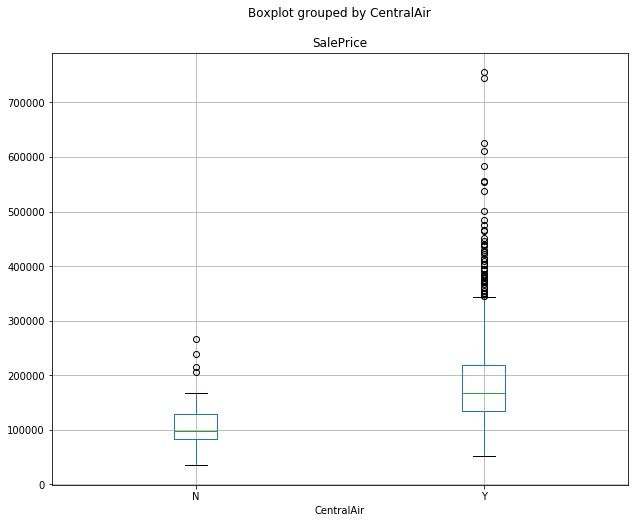

In [145]:
df_train.boxplot('SalePrice', 'CentralAir', figsize=(10,8))

In [146]:
print('Missing in train: ', df_train['CentralAir'].isnull().sum())
print('Missing in test: ', df_test['CentralAir'].isnull().sum())

Missing in train:  0
Missing in test:  0


<a name='3.34'></a>
## 3.34 Electrical

Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

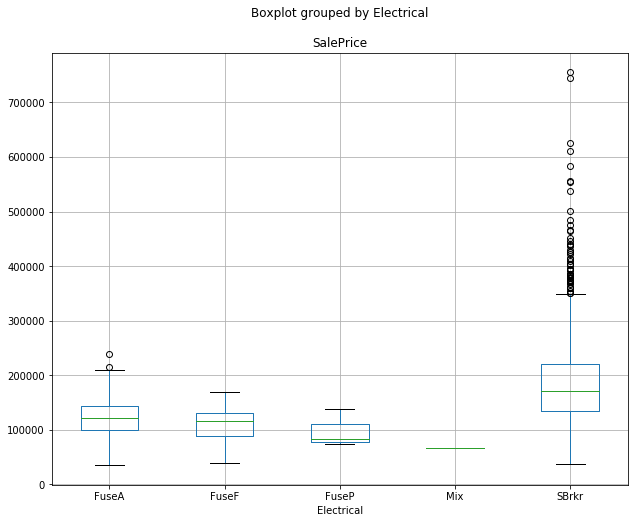

In [147]:
df_train.boxplot('SalePrice', 'Electrical', figsize=(10,8))

In [148]:
print('Missing in train: ', df_train['Electrical'].isnull().sum())
print('Missing in test: ', df_test['Electrical'].isnull().sum())

Missing in train:  1
Missing in test:  0


In [149]:
print('Value missing in test set: ', list(set(df_train['Electrical'])-set(df_test['Electrical'])))

Value missing in test set:  [nan, 'Mix']


The 'Mix' observation is not on the test set, we can safetly drop this observation from the train set and keep the variable 'Electric'. Same with the missing value.

**NOTE: DROP THE MISSING VALUE AND THE ONE WITH 'Electrical' = 'Mix**

In [150]:
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train = df_train.drop(df_train.loc[df_train['Electrical']=='Mix'].index)

<a name='3.35'></a>
## 3.35 1stFlrSF

First Floor square feet

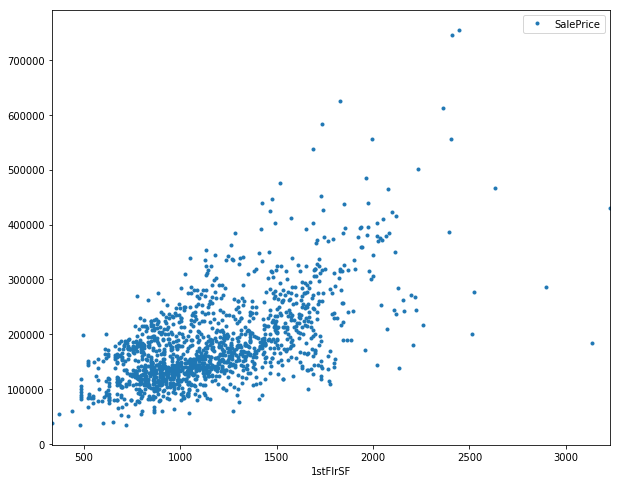

In [151]:
df_train.plot('1stFlrSF', 'SalePrice', figsize=(10,8), style='.')

In [152]:
print('Missing in train: ', df_train['1stFlrSF'].isnull().sum())
print('Missing in test: ', df_test['1stFlrSF'].isnull().sum())

Missing in train:  0
Missing in test:  0


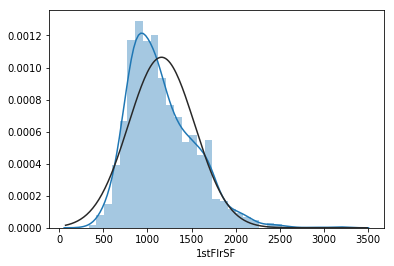

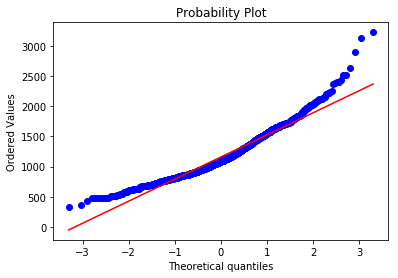

In [153]:
#histogram and normal probability plot
sns.distplot(df_train['1stFlrSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['1stFlrSF'], plot=plt)

In [154]:
print("Skewness: %f" % df_train['1stFlrSF'].skew())
print("Kurtosis: %f" % df_train['1stFlrSF'].kurt())

Skewness: 0.951795
Kurtosis: 1.494930


In [155]:
df_train['1stFlrSF'] = power_transform(np.array(df_train['1stFlrSF']).reshape(-1,1), method='box-cox').ravel()

In [156]:
print("Skewness: %f" % df_train['1stFlrSF'].skew())
print("Kurtosis: %f" % df_train['1stFlrSF'].kurt())

Skewness: 0.000142
Kurtosis: -0.051641


**NOTE: USE BOX-COX TO TRANSFORM '1stFlrSf'**

<a name='3.36'></a>
## 3.36 2ndFlrSF

Second floor square feet

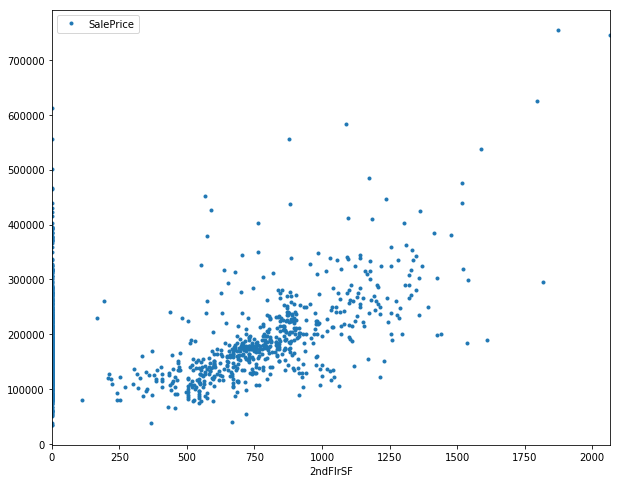

In [157]:
df_train.plot('2ndFlrSF', 'SalePrice', figsize=(10,8), style='.')

In [158]:
print('Missing in train: ', df_train['2ndFlrSF'].isnull().sum())
print('Missing in test: ', df_test['2ndFlrSF'].isnull().sum())

Missing in train:  0
Missing in test:  0


Many houses without a second floor. We can make use of that fact to later create a new categorical variable.

**NOTE: CREATE 2NDFLOOR (Y/N) CATEGORICAL VARIABLE**

<a name='3.37'></a>
## 3.37 LowQualFinSF

Low quality finished square feet (all floors)

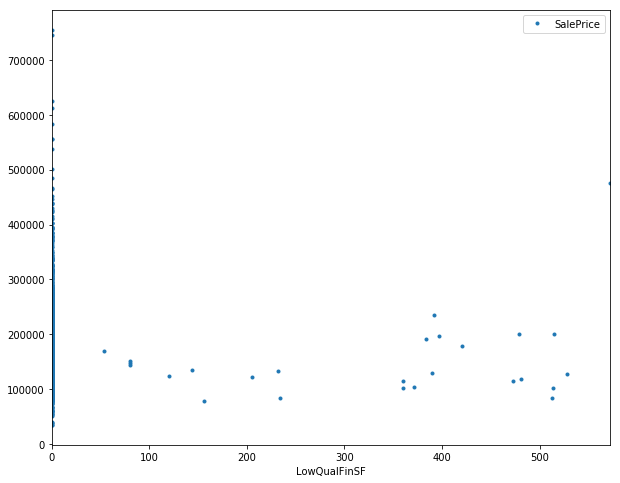

In [159]:
df_train.plot('LowQualFinSF', 'SalePrice', figsize=(10,8), style='.')

In [160]:
print('Missing in train: ', df_train['LowQualFinSF'].isnull().sum())
print('Missing in test: ', df_test['LowQualFinSF'].isnull().sum())

Missing in train:  0
Missing in test:  0


**NOTE: CREATE CATEGORICAL VARIABLE AND GET RID OF THIS NUMERICAL ONE**

<a name='3.38'></a>
## 3.38 GrLivArea

Above grade (ground) living area square feet

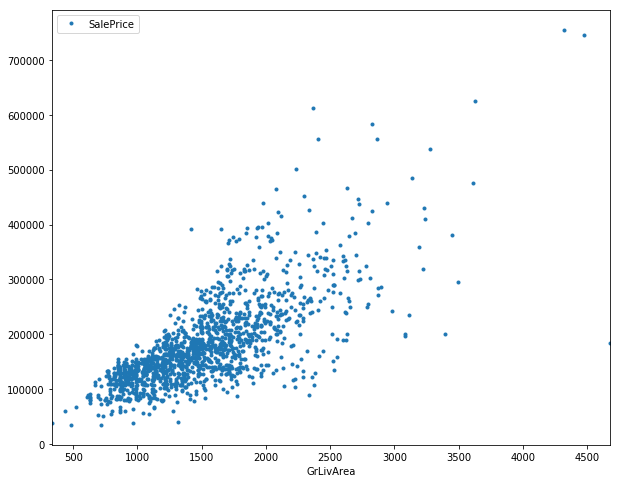

In [161]:
df_train.plot('GrLivArea', 'SalePrice', figsize=(10,8), style='.')

There is one outlier on the bottom right side of the plot. We can remove it from our dataset.

In [162]:
df_train = df_train.drop(df_train.loc[(df_train['GrLivArea'] > 4000) & (df_train['SalePrice'] < 300000)].index)

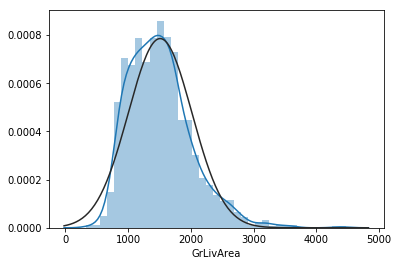

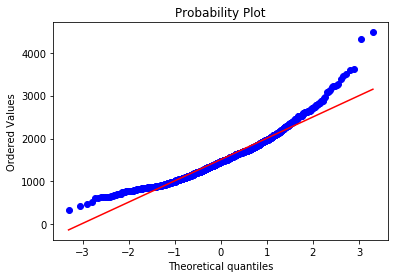

In [163]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [164]:
print("Skewness: %f" % df_train['GrLivArea'].skew())
print("Kurtosis: %f" % df_train['GrLivArea'].kurt())

Skewness: 1.011582
Kurtosis: 2.065577


In [165]:
df_train['GrLivArea'] = power_transform(np.array(df_train['GrLivArea']).reshape(-1,1), method='box-cox').ravel()

In [166]:
print("Skewness: %f" % df_train['GrLivArea'].skew())
print("Kurtosis: %f" % df_train['GrLivArea'].kurt())

Skewness: 0.000564
Kurtosis: 0.074958


**NOTE: BOX-COX TRANSFORM TO 'GrLivArea'**

<a name='3.39'></a>
## 3.39 BsmtFullBath

Basement full bathrooms

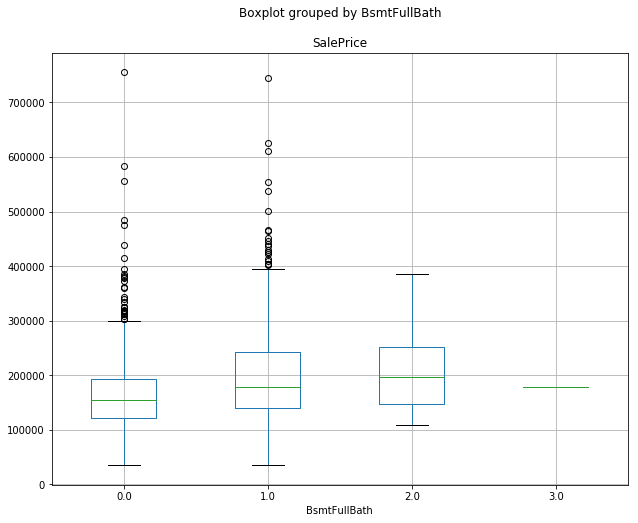

In [167]:
df_train.boxplot('SalePrice', 'BsmtFullBath', figsize=(10,8))

In [168]:
print('Missing in train: ', df_train['BsmtFullBath'].isnull().sum())
print('Missing in test: ', df_test['BsmtFullBath'].isnull().sum())

Missing in train:  0
Missing in test:  2


In [169]:
print(df_test['BsmtFullBath'].value_counts())

0.0    849
1.0    584
2.0     23
3.0      1
Name: BsmtFullBath, dtype: int64


There is only one observation on train and test with 3.0 full bathrooms. Let's combine this with 2.0.

**NOTE: COMBINE BATHROOM 3.0 WITH 2.0**

In [170]:
df_train['BsmtFullBath'] = df_train['BsmtFullBath'].apply(lambda x:2.0 if x in [2.0, 3.0] else x)

**NOTE: IMPUTE MISSING VALUES IN TEST SET WITH KNOW VARIABLES**

In [171]:
df_test.loc[df_test['BsmtFullBath'].isnull() & (df_test['TotalBsmtSF']==0), 'BsmtFullBath'] = 0.0
df_test.loc[df_test['BsmtFullBath'].isnull() & (df_test['BsmtUnfSF']==0), 'BsmtFullBath'] = 0.0

In [172]:
print('Missing in train: ', df_train['BsmtFullBath'].isnull().sum())
print('Missing in test: ', df_test['BsmtFullBath'].isnull().sum())

Missing in train:  0
Missing in test:  1


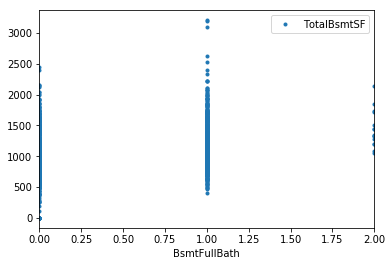

In [173]:
df_train.plot('BsmtFullBath', 'TotalBsmtSF', style='.')

In [174]:
print(df_test.loc[df_test[df_test['BsmtFullBath'].isnull()].index.tolist(), 'TotalBsmtSF'])

660    660.0
Name: TotalBsmtSF, dtype: float64


In [175]:
df_test['BsmtFullBath'].fillna(0.0, inplace=True)

**NOTE: IMPUTE LAST MISSING OBSERVATION WITH 0.0**

<a name='3.40'></a>
## 3.40 BsmtHalfBath

Basement half bathrooms

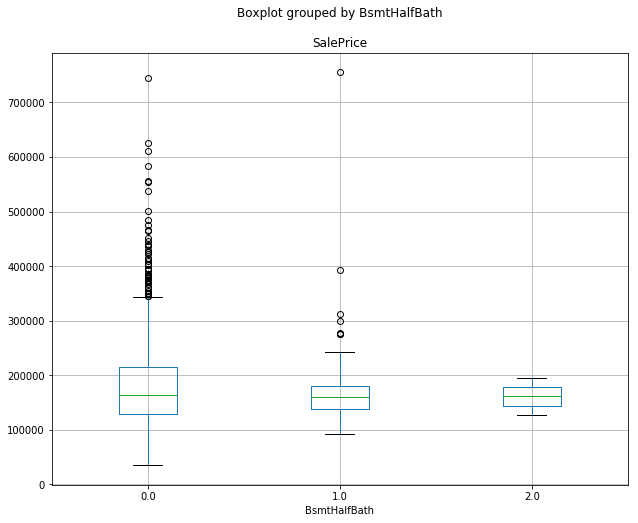

In [176]:
df_train.boxplot('SalePrice', 'BsmtHalfBath', figsize=(10,8))

In [177]:
print('Missing in train: ', df_train['BsmtHalfBath'].isnull().sum())
print('Missing in test: ', df_test['BsmtHalfBath'].isnull().sum())

Missing in train:  0
Missing in test:  2


In [178]:
df_test.loc[df_test['BsmtHalfBath'].isnull() & (df_test['TotalBsmtSF']==0), 'BsmtHalfBath'] = 0.0
df_test.loc[df_test['BsmtHalfBath'].isnull() & (df_test['BsmtUnfSF']==0), 'BsmtHalfBath'] = 0.0
df_test['BsmtHalfBath'].fillna(0.0, inplace=True)

**NOTE: EXACTLY THE SAME AS WITH BSMTFULLBATH**

<a name='3.41'></a>
## 3.41 FullBath

Full bathrooms above grade

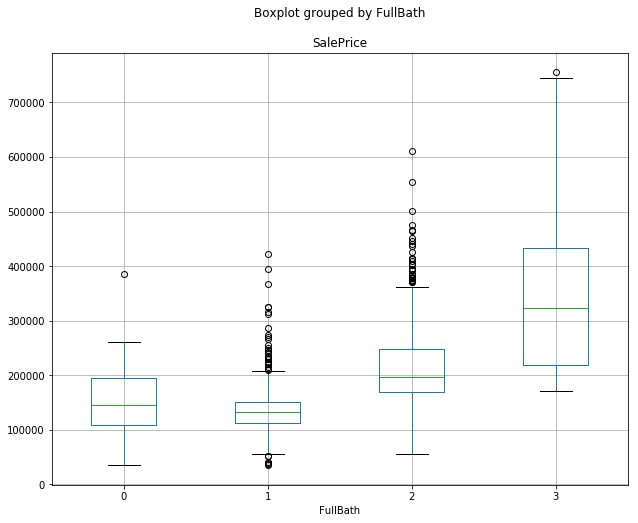

In [179]:
df_train.boxplot('SalePrice', 'FullBath', figsize=(10,8))

In [180]:
print('Missing in train: ', df_train['FullBath'].isnull().sum())
print('Missing in test: ', df_test['FullBath'].isnull().sum())

Missing in train:  0
Missing in test:  0


**NOTE: THERE IS ONE EXTRA OBSERVATION IN TEST SET, COMBINE X>=3 TO 3**

<a name='3.42'></a>
## 3.42 HalfBath

Half baths above grade

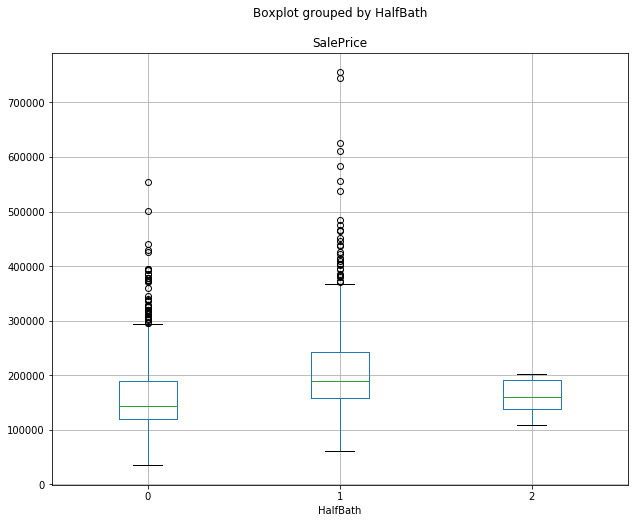

In [181]:
df_train.boxplot('SalePrice', 'HalfBath', figsize=(10,8))

In [182]:
print('Missing in train: ', df_train['HalfBath'].isnull().sum())
print('Missing in test: ', df_test['HalfBath'].isnull().sum())

Missing in train:  0
Missing in test:  0


<a name='3.43'></a>
## 3.43 BedroomAbvGr

Bedrooms above grade (does NOT include basement bedrooms)

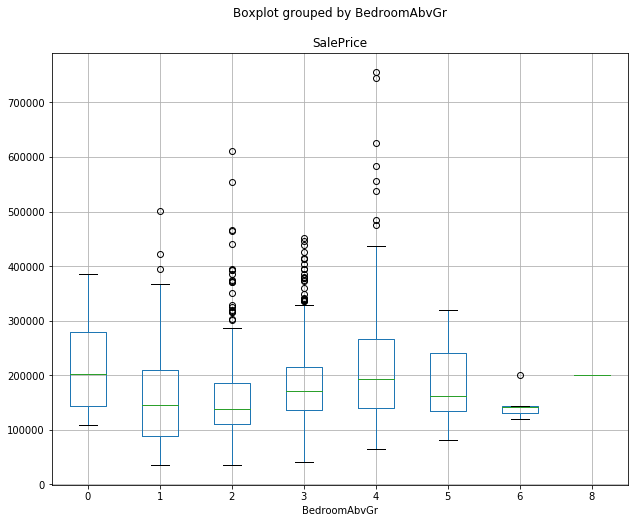

In [183]:
df_train.boxplot('SalePrice', 'BedroomAbvGr', figsize=(10,8))

In [184]:
print('Missing in train: ', df_train['BedroomAbvGr'].isnull().sum())
print('Missing in test: ', df_test['BedroomAbvGr'].isnull().sum())

Missing in train:  0
Missing in test:  0


In [185]:
print('Unique values in train: ', len(df_train['BedroomAbvGr'].unique()))
print('Unique values in test: ', len(df_test['BedroomAbvGr'].unique()))

Unique values in train:  8
Unique values in test:  7


In [186]:
print('Missing BedroomAbvGr in test set: ', list(set(df_train['BedroomAbvGr'])-set(df_test['BedroomAbvGr'])))

Missing BedroomAbvGr in test set:  [8]


**NOTE: REMOVE THE OBSERVATION WITH 8 BEEDROOMS**

In [187]:
df_train = df_train.drop(df_train.loc[df_train['BedroomAbvGr'] == 8].index)

<a name='3.44'></a>
## 3.44 KitchenAbvGr

Kitchens above grade

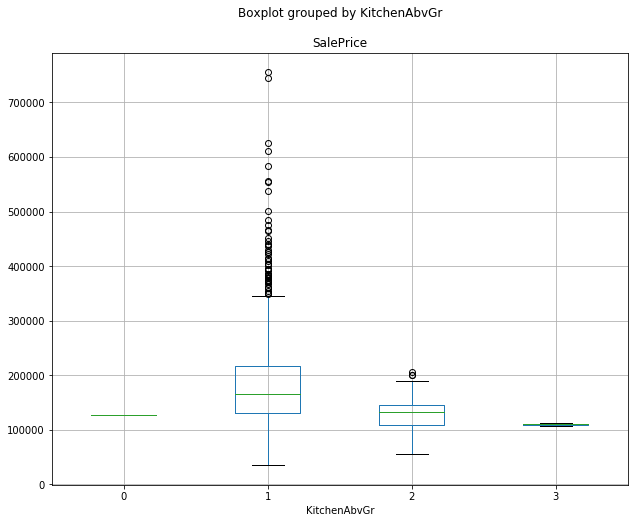

In [188]:
df_train.boxplot('SalePrice', 'KitchenAbvGr', figsize=(10,8))

In [189]:
print('Missing in train: ', df_train['KitchenAbvGr'].isnull().sum())
print('Missing in test: ', df_test['KitchenAbvGr'].isnull().sum())

Missing in train:  0
Missing in test:  0


In [190]:
print('Missing KitchenAbvGr in test set: ', list(set(df_train['KitchenAbvGr'])-set(df_test['KitchenAbvGr'])))

Missing KitchenAbvGr in test set:  [3]


In [191]:
print(df_train['KitchenAbvGr'].value_counts())
print(df_test['KitchenAbvGr'].value_counts())

1    1387
2      64
3       2
0       1
Name: KitchenAbvGr, dtype: int64
1    1393
2      64
0       2
Name: KitchenAbvGr, dtype: int64


**NOTE: COMBINE THE OBSERVATIONS WITH 3 KITCHENS TO 2 & COMBINE 0 KITCHENS WITH 1**

In [192]:
df_train['KitchenAbvGr'] = df_train['KitchenAbvGr'].apply(lambda x:2 if x in [2, 3] else 1)
df_test['KitchenAbvGr'] = df_test['KitchenAbvGr'].apply(lambda x:2 if x in [2, 3] else 1)
print(df_train['KitchenAbvGr'].value_counts())
print(df_test['KitchenAbvGr'].value_counts())

1    1388
2      66
Name: KitchenAbvGr, dtype: int64
1    1395
2      64
Name: KitchenAbvGr, dtype: int64



<a name='3.45'></a>
## 3.45 KitchenQual

Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

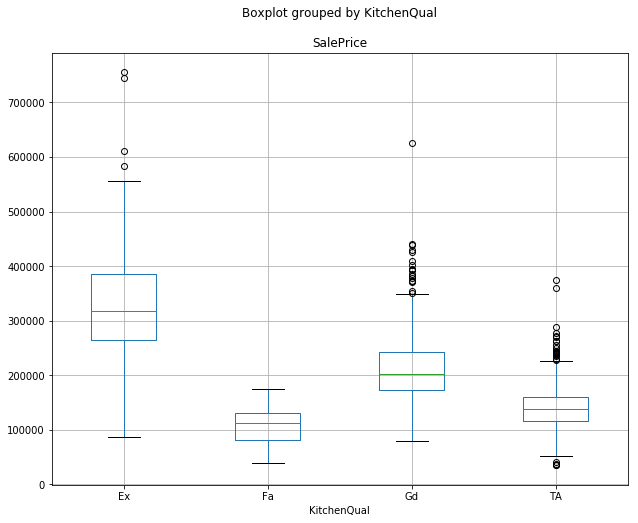

In [193]:
df_train.boxplot('SalePrice', 'KitchenQual', figsize=(10,8))

In [194]:
print('Missing in train: ', df_train['KitchenQual'].isnull().sum())
print('Missing in test: ', df_test['KitchenQual'].isnull().sum())

Missing in train:  0
Missing in test:  1


**NOTE: IMPUTE TO TYPICAL/AVERAGE**

In [195]:
df_test['KitchenQual'].fillna('TA', inplace=True)

<a name='3.46'></a>
## 3.46 TotRmsAbvGrd

Total rooms above grade (does not include bathrooms)

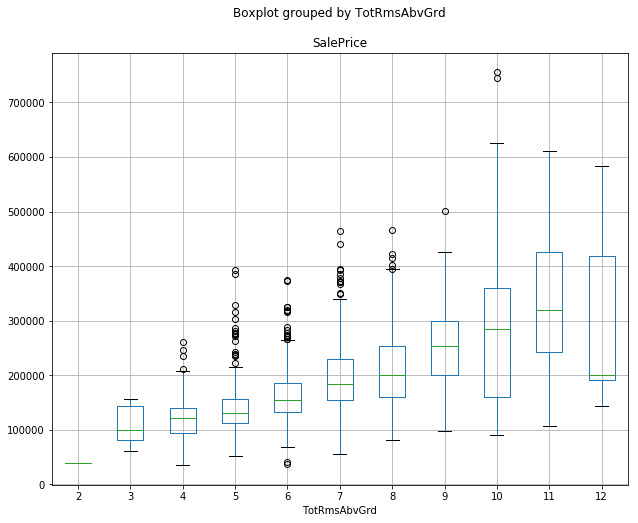

In [196]:
df_train.boxplot('SalePrice', 'TotRmsAbvGrd', figsize=(10,8))

In [197]:
print('Missing in train: ', df_train['TotRmsAbvGrd'].isnull().sum())
print('Missing in test: ', df_test['TotRmsAbvGrd'].isnull().sum())

Missing in train:  0
Missing in test:  0


In [198]:
print(df_train['TotRmsAbvGrd'].value_counts())
print(df_test['TotRmsAbvGrd'].value_counts())

6     401
7     328
5     275
8     187
4      97
9      74
10     47
11     17
3      17
12     10
2       1
Name: TotRmsAbvGrd, dtype: int64
6     442
7     320
5     308
8     160
4      99
9      68
10     33
11     14
3       8
12      5
15      1
13      1
Name: TotRmsAbvGrd, dtype: int64


**NOTE: GROUP ANYTHING HIGHER THAN 12 TO 12 AND LOWER TO 3 TO 3**

In [199]:
df_train['TotRmsAbvGrd'] = df_train['TotRmsAbvGrd'].apply(lambda x:12 if x>=12 else x)
df_train['TotRmsAbvGrd'] = df_train['TotRmsAbvGrd'].apply(lambda x:3 if x<=3 else x)
df_test['TotRmsAbvGrd'] = df_test['TotRmsAbvGrd'].apply(lambda x:12 if x>=12 else x)
df_test['TotRmsAbvGrd'] = df_test['TotRmsAbvGrd'].apply(lambda x:3 if x<=3 else x)

<a name='3.47'></a>
## 3.47 Functional

Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

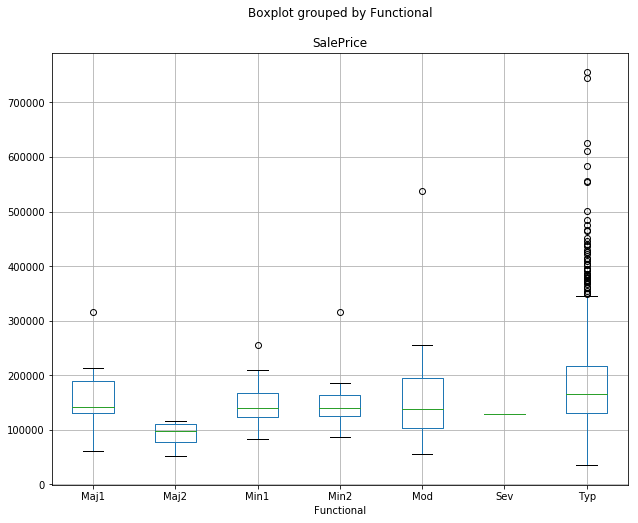

In [200]:
df_train.boxplot('SalePrice', 'Functional', figsize=(10,8))

In [201]:
print('Missing in train: ', df_train['Functional'].isnull().sum())
print('Missing in test: ', df_test['Functional'].isnull().sum())

Missing in train:  0
Missing in test:  2


In [202]:
print(df_train['Functional'].value_counts())
print(df_test['Functional'].value_counts())

Typ     1355
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       4
Sev        1
Name: Functional, dtype: int64
Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: Functional, dtype: int64


**NOTE: SEPARATE INTO TWO (TYP AND NOT-TYP)  AND IMPUTE TO TYP**

In [203]:
df_train['Functional'] = df_train['Functional'].apply(lambda x:'NotTyp' if x!='Typ' else 'Typ')
df_test['Functional'] = df_test['Functional'].apply(lambda x:'NotTyp' if x!='Typ' else 'Typ')
df_test['Functional'].fillna('Typ', inplace=True)

<a name='3.48'></a>
## 3.48 Fireplaces

Number of fireplaces

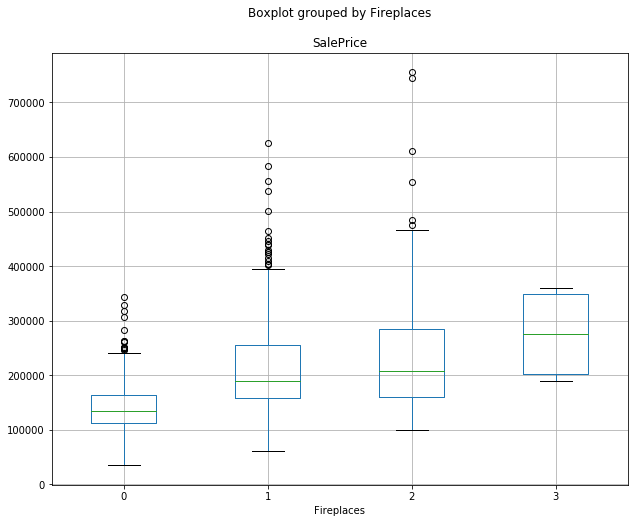

In [204]:
df_train.boxplot('SalePrice', 'Fireplaces', figsize=(10,8))

In [205]:
print('Missing in train: ', df_train['Fireplaces'].isnull().sum())
print('Missing in test: ', df_test['Fireplaces'].isnull().sum())

Missing in train:  0
Missing in test:  0


In [206]:
print(df_train['Fireplaces'].value_counts())
print(df_test['Fireplaces'].value_counts())

0    687
1    648
2    115
3      4
Name: Fireplaces, dtype: int64
0    730
1    618
2    104
3      6
4      1
Name: Fireplaces, dtype: int64


**NOTE: COMBINE ANY WITH 2+ TO ONE LABEL**

In [207]:
df_train['Fireplaces'] = df_train['Fireplaces'].apply(lambda x:'2+' if x>=2 else x)
df_test['Fireplaces'] = df_test['Fireplaces'].apply(lambda x:'2+' if x>=2 else x)

<a name='3.49'></a>
## 3.49 FireplaceQu

Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

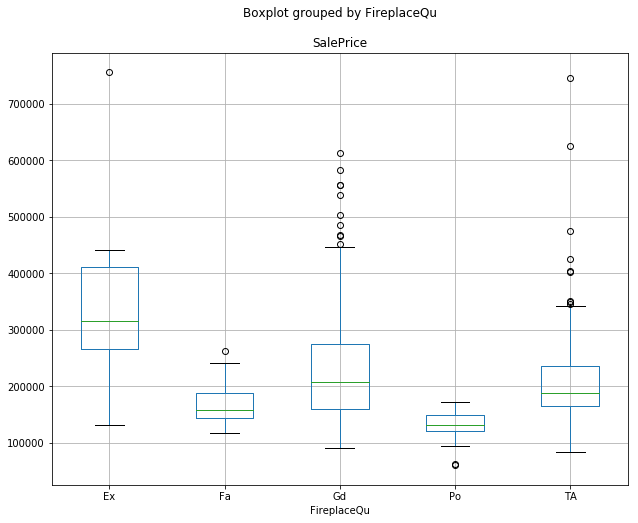

In [208]:
df_train.boxplot('SalePrice', 'FireplaceQu', figsize=(10,8))

In [209]:
print('Missing in train: ', df_train['FireplaceQu'].isnull().sum())
print('Missing in test: ', df_test['FireplaceQu'].isnull().sum())

Missing in train:  687
Missing in test:  730


In [210]:
df_train.loc[df_train['FireplaceQu'].isnull() & (df_train['Fireplaces']==0), 'FireplaceQu'] = 'NoFire'
df_test.loc[df_test['FireplaceQu'].isnull() & (df_test['Fireplaces']==0), 'FireplaceQu'] = 'NoFire'

<a name='3.50'></a>
## 3.50 Garage features

There are 7 features related to the garage

In [211]:
garage_feat = ['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']
for feat in garage_feat:
    print(feat)
    print('Missing in train: ', df_train[feat].isnull().sum())
    print('Missing in test: ', df_test[feat].isnull().sum())

GarageType
Missing in train:  80
Missing in test:  76
GarageYrBlt
Missing in train:  80
Missing in test:  78
GarageFinish
Missing in train:  80
Missing in test:  78
GarageCars
Missing in train:  0
Missing in test:  1
GarageArea
Missing in train:  0
Missing in test:  1
GarageQual
Missing in train:  80
Missing in test:  78
GarageCond
Missing in train:  80
Missing in test:  78


In [212]:
def impute_garage_feat(df):
    mask = (df['GarageArea']==0)
    df.loc[df['GarageType'].isnull() & mask, 'GarageType'] = 'NoGarage'
    df.loc[df['GarageFinish'].isnull() & mask, 'GarageFinish'] = 'NoGarage'
    df.loc[df['GarageQual'].isnull() & mask, 'GarageQual'] = 'NoGarage'
    df.loc[df['GarageCond'].isnull() & mask, 'GarageCond'] = 'NoGarage'

    return df

df_train = impute_garage_feat(df_train)
df_test = impute_garage_feat(df_test)

In [213]:
garage_feat = ['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']
for feat in garage_feat:
    print(feat)
    print('Missing in train: ', df_train[feat].isnull().sum())
    print('Missing in test: ', df_test[feat].isnull().sum())

GarageType
Missing in train:  0
Missing in test:  0
GarageYrBlt
Missing in train:  80
Missing in test:  78
GarageFinish
Missing in train:  0
Missing in test:  2
GarageCars
Missing in train:  0
Missing in test:  1
GarageArea
Missing in train:  0
Missing in test:  1
GarageQual
Missing in train:  0
Missing in test:  2
GarageCond
Missing in train:  0
Missing in test:  2


In [214]:
print(df_test[df_test['GarageFinish'].isnull()].index.tolist())
print(df_test[df_test['GarageCars'].isnull()].index.tolist())
print(df_test[df_test['GarageArea'].isnull()].index.tolist())
print(df_test[df_test['GarageQual'].isnull()].index.tolist())
print(df_test[df_test['GarageCond'].isnull()].index.tolist())

[666, 1116]
[1116]
[1116]
[666, 1116]
[666, 1116]


In [215]:
df_test.loc[666][['GarageCars', 'GarageArea','GarageType']]

GarageCars         1
GarageArea       360
GarageType    Detchd
Name: 666, dtype: object

In [216]:
df_test.loc[1116][['GarageCars', 'GarageArea','GarageType']]

GarageCars       NaN
GarageArea       NaN
GarageType    Detchd
Name: 1116, dtype: object

(array([ 1.,  2.,  8., 19., 37., 28.,  8.,  1.,  1.,  1.]),
 array([ 35311. ,  56219.9,  77128.8,  98037.7, 118946.6, 139855.5,
        160764.4, 181673.3, 202582.2, 223491.1, 244400. ]),
 <a list of 10 Patch objects>)

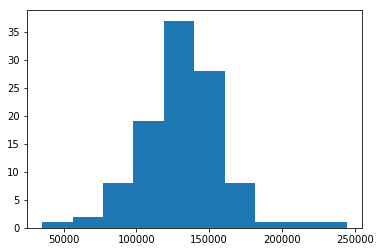

In [217]:
plt.hist(df_train[(df_train['GarageCars']==1) & (df_train['GarageArea'] < 400) & (df_train['GarageArea'] > 300)]['SalePrice'])

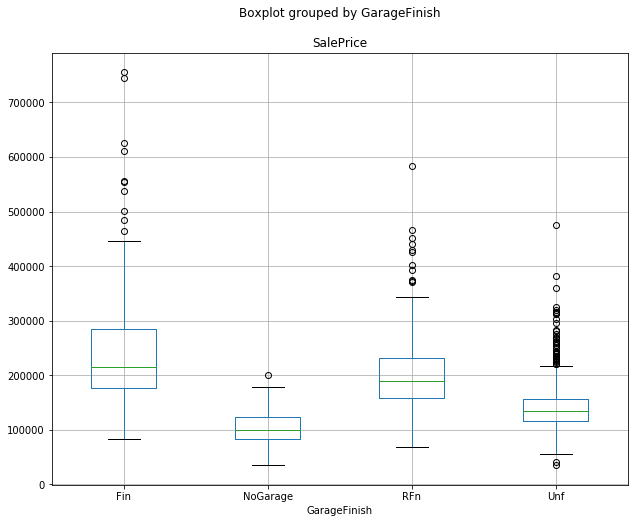

In [218]:
df_train.boxplot('SalePrice', 'GarageFinish', figsize=(10,8))

In [219]:
df_test.loc[df_test['GarageFinish'].isnull(), 'GarageFinish'] = 'Unf'

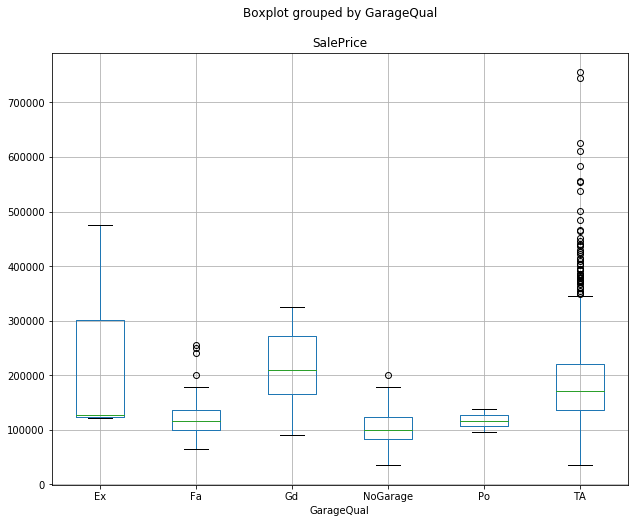

In [220]:
df_train.boxplot('SalePrice', 'GarageQual', figsize=(10,8))

In [221]:
df_test.loc[df_test['GarageQual'].isnull(), 'GarageQual'] = 'Fa'

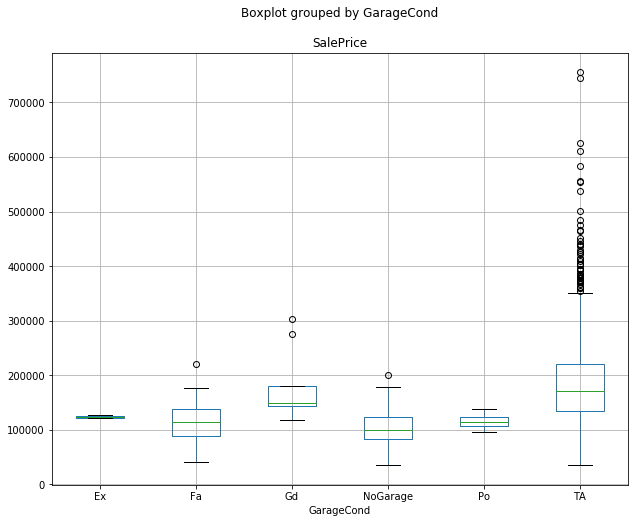

In [222]:
df_train.boxplot('SalePrice', 'GarageCond', figsize=(10,8))

In [223]:
df_test.loc[df_test['GarageCond'].isnull(), 'GarageCond'] = 'Fa'

In [224]:
df_test['GarageCars'].fillna(1, inplace=True)
df_test['GarageArea'].fillna(360, inplace=True)

**NOTE: IMPUTE GARAGE FEAT WITH KNOWN PARAMETERS**

Now, we need to deal with the feature 'GarageYrBlt'

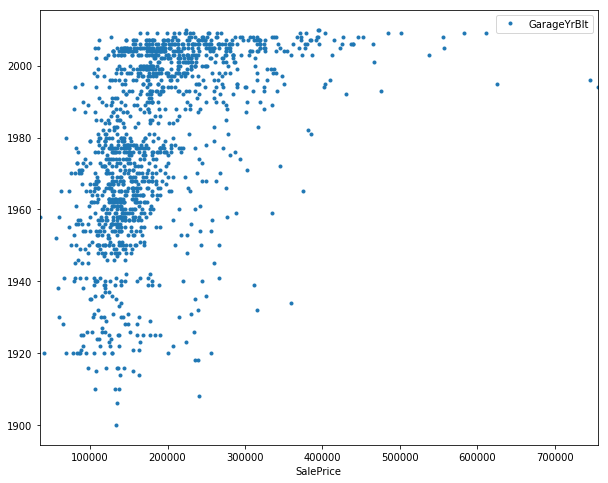

In [225]:
df_train.plot('SalePrice', 'GarageYrBlt', figsize=(10,8), style='.')

**NOTE: LET'S SET THE MISSING VALUES TO 0 AND THEN WE CAN CREATE CATEGORICAL FEAT FROM THEM**

In [226]:
df_train['GarageYrBlt'].fillna(0, inplace=True)
df_test['GarageYrBlt'].fillna(0, inplace=True)

<a name='3.51'></a>
## 3.51 PavedDrive

Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

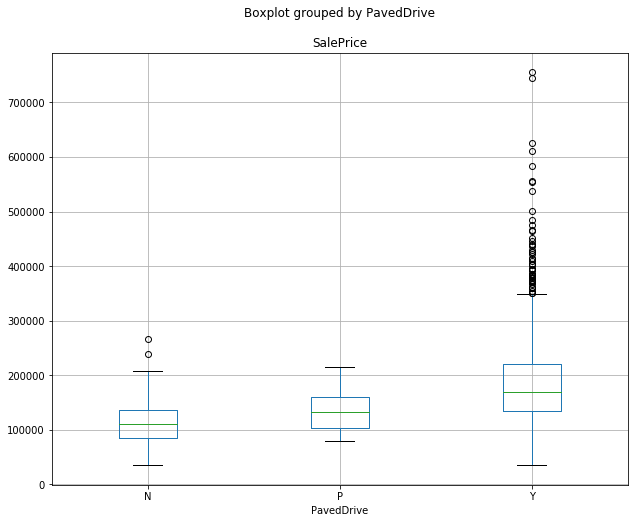

In [227]:
df_train.boxplot('SalePrice', 'PavedDrive', figsize=(10,8))

In [228]:
print('Missing in train: ', df_train['PavedDrive'].isnull().sum())
print('Missing in test: ', df_test['PavedDrive'].isnull().sum())

Missing in train:  0
Missing in test:  0


In [229]:
print(df_train['PavedDrive'].value_counts())
print(df_test['PavedDrive'].value_counts())

Y    1336
N      88
P      30
Name: PavedDrive, dtype: int64
Y    1301
N     126
P      32
Name: PavedDrive, dtype: int64


<a name='3.52'></a>
## 3.52 WoodDeckSF

Wood deck area in square feet

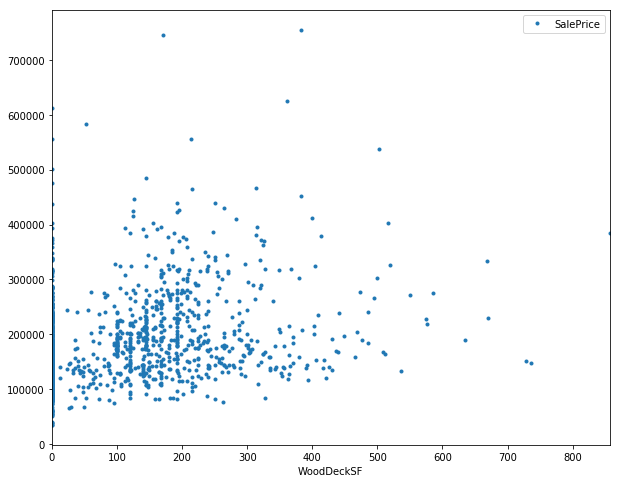

In [230]:
df_train.plot('WoodDeckSF', 'SalePrice', figsize=(10,8), style='.')

In [231]:
print('Missing in train: ', df_train['WoodDeckSF'].isnull().sum())
print('Missing in test: ', df_test['WoodDeckSF'].isnull().sum())

Missing in train:  0
Missing in test:  0


**NOTE: WE CAN MAKE A CATEGORICAL VARIABLE WOODDECK (Y/N)**

<a name='3.53'></a>
## 3.53 OpenPorchSF

Open porch area in square feet

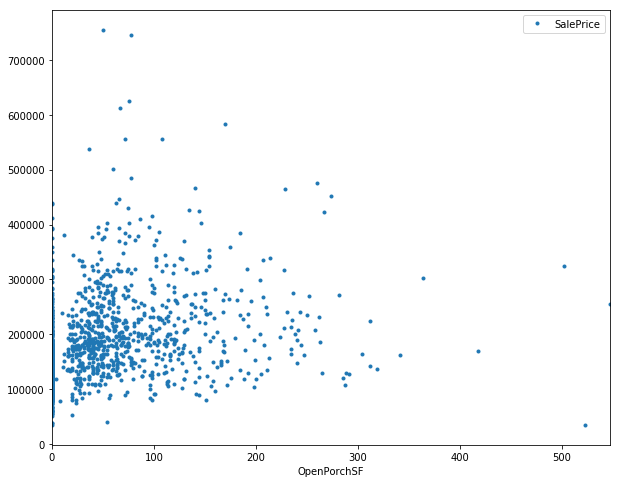

In [232]:
df_train.plot('OpenPorchSF', 'SalePrice', figsize=(10,8), style='.')

In [233]:
print('Missing in train: ', df_train['OpenPorchSF'].isnull().sum())
print('Missing in test: ', df_test['OpenPorchSF'].isnull().sum())

Missing in train:  0
Missing in test:  0


**NOTE: WE CAN MAKE A CATEGORICAL VARIABLE OPENPORCH (Y/N)**

<a name='3.54'></a>
## 3.54 EnclosedPorch

Enclosed porch area in square feet

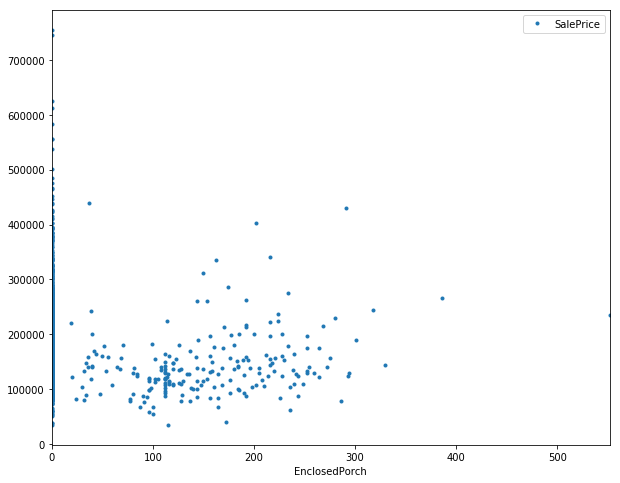

In [234]:
df_train.plot('EnclosedPorch', 'SalePrice', figsize=(10,8), style='.')

In [235]:
print('Missing in train: ', df_train['EnclosedPorch'].isnull().sum())
print('Missing in test: ', df_test['EnclosedPorch'].isnull().sum())

Missing in train:  0
Missing in test:  0


**NOTE: WE CAN MAKE A CATEGORICAL VARIABLE ENCLOSEDPORCH (Y/N)**

<a name='3.55'></a>
## 3.55 3SsnPorch

Three season porch area in square feet

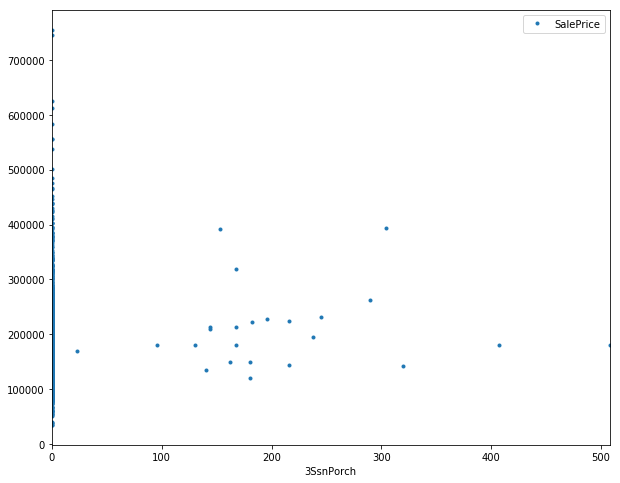

In [236]:
df_train.plot('3SsnPorch', 'SalePrice', figsize=(10,8), style='.')

In [237]:
print('Missing in train: ', df_train['3SsnPorch'].isnull().sum())
print('Missing in test: ', df_test['3SsnPorch'].isnull().sum())

Missing in train:  0
Missing in test:  0


**NOTE: WE CAN MAKE A CATEGORICAL VARIABLE 3SnPORCH (Y/N)**

<a name='3.56'></a>
## 3.56 ScreenPorch

Screen porch area in square feet

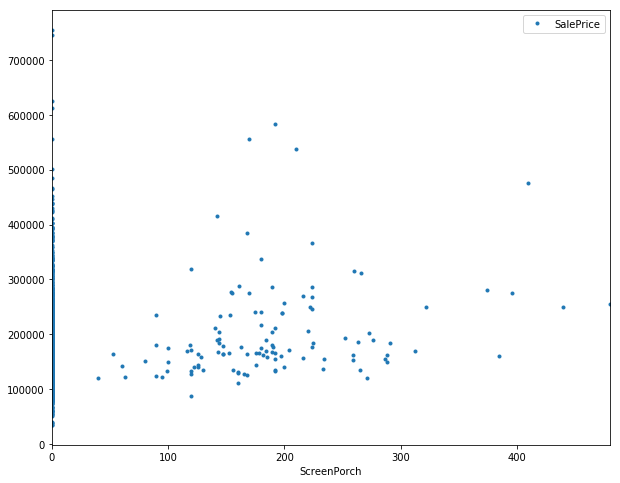

In [238]:
df_train.plot('ScreenPorch', 'SalePrice', figsize=(10,8), style='.')

In [239]:
print('Missing in train: ', df_train['ScreenPorch'].isnull().sum())
print('Missing in test: ', df_test['ScreenPorch'].isnull().sum())

Missing in train:  0
Missing in test:  0


**NOTE: WE CAN MAKE A CATEGORICAL VARIABLE SCREENPORCH (Y/N)**

<a name='3.57'></a>
## 3.57 PoolArea

Pool area in square feet

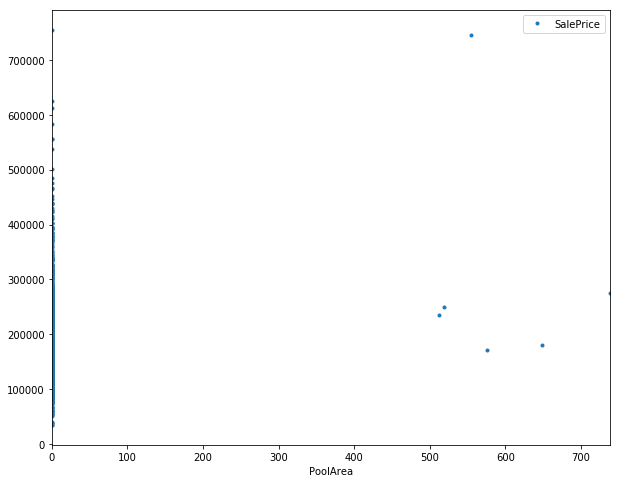

In [240]:
df_train.plot('PoolArea', 'SalePrice', figsize=(10,8), style='.')

In [241]:
print('Missing in train: ', df_train['PoolArea'].isnull().sum())
print('Missing in test: ', df_test['PoolArea'].isnull().sum())

Missing in train:  0
Missing in test:  0


**NOTE: CREATE CATEGORICAL FEATURE POOL (Y/N)**

<a name='3.58'></a>
## 3.58 PoolQC

Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

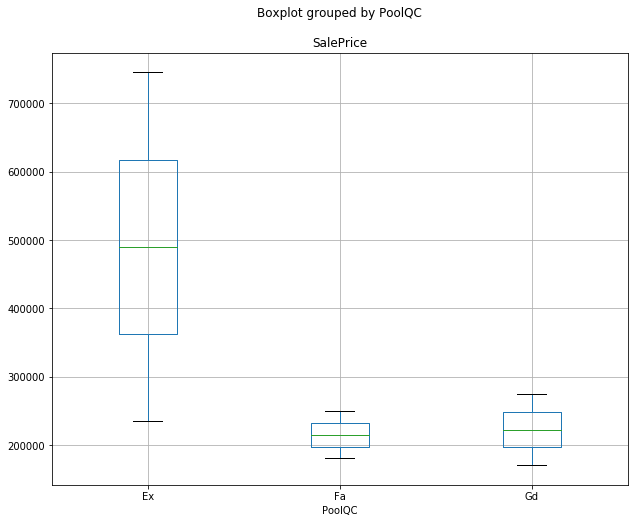

In [242]:
df_train.boxplot('SalePrice', 'PoolQC', figsize=(10,8))

In [243]:
print('Missing in train: ', df_train['PoolQC'].isnull().sum())
print('Missing in test: ', df_test['PoolQC'].isnull().sum())

Missing in train:  1448
Missing in test:  1456


In [244]:
df_train.loc[df_train['PoolQC'].isnull() & (df_train['PoolArea'] == 0), 'PoolQC'] = 'NoPool'
df_test.loc[df_test['PoolQC'].isnull() & (df_test['PoolArea'] == 0), 'PoolQC'] = 'NoPool'

In [245]:
print('Missing in train: ', df_train['PoolQC'].isnull().sum())
print('Missing in test: ', df_test['PoolQC'].isnull().sum())

Missing in train:  0
Missing in test:  3


In [246]:
print(df_train['PoolQC'].value_counts())
print(df_test['PoolQC'].value_counts())

NoPool    1448
Ex           2
Gd           2
Fa           2
Name: PoolQC, dtype: int64
NoPool    1453
Ex           2
Gd           1
Name: PoolQC, dtype: int64


**NOTE: WE CAN DROP THIS FEATURE SINCE WE WILL CREATE A CATEGORICAL FEAT FROM POOLAREA**

In [247]:
df_train = df_train.drop(['PoolQC'], axis=1)
df_test = df_test.drop(['PoolQC'], axis=1)

<a name='3.59'></a>
## 3.59 Fence

Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

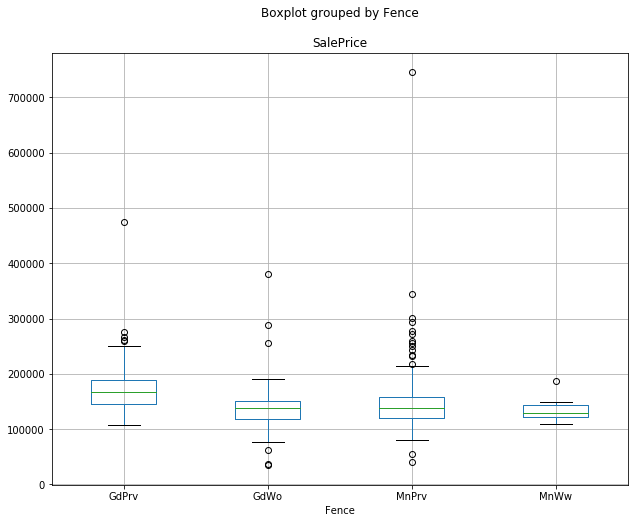

In [248]:
df_train.boxplot('SalePrice', 'Fence', figsize=(10,8))

**NOTE: IMPUTE VALUES WITH 'NoFence'**

In [249]:
df_train['Fence'].fillna('NoFence', inplace=True)
df_test['Fence'].fillna('NoFence', inplace=True)

In [250]:
print(df_train['Fence'].value_counts())
print(df_test['Fence'].value_counts())

NoFence    1173
MnPrv       157
GdPrv        59
GdWo         54
MnWw         11
Name: Fence, dtype: int64
NoFence    1169
MnPrv       172
GdPrv        59
GdWo         58
MnWw          1
Name: Fence, dtype: int64


**NOTE: COMBINE OBSERVATIONS TO WHETHER IT HAS OR NOT A FENCE**

In [251]:
df_train['Fence'] = df_train['Fence'].apply(lambda x:'N' if x=='NoFence' else 'Y')
df_test['Fence'] = df_test['Fence'].apply(lambda x:'N' if x=='NoFence' else 'Y')

<a name='3.60'></a>
## 3.60 MiscFeature

Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

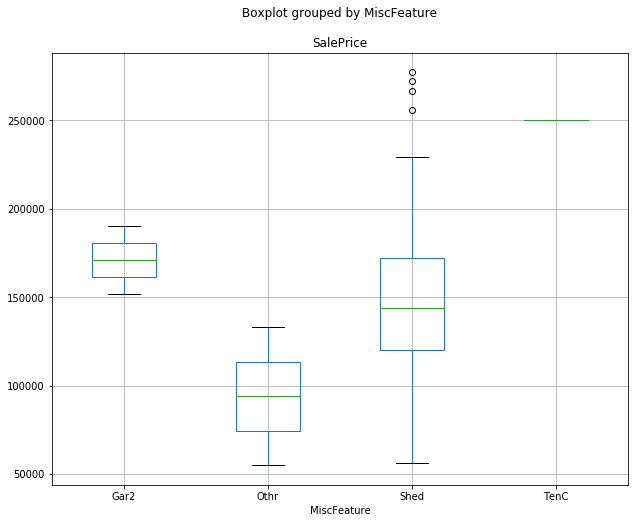

In [252]:
df_train.boxplot('SalePrice', 'MiscFeature', figsize=(10,8))

In [253]:
df_train['MiscFeature'].fillna('NoMisc', inplace=True)
df_test['MiscFeature'].fillna('NoMisc', inplace=True)

**NOTE: IMPUTE TO 'NoMisc'**

In [254]:
print('Missing in train: ', df_train['MiscFeature'].isnull().sum())
print('Missing in test: ', df_test['MiscFeature'].isnull().sum())

Missing in train:  0
Missing in test:  0


**NOTE: CHANGE TO WHETER THERE IS A MISC OR NOT (Y/N)**

In [255]:
df_train['MiscFeature'] = df_train['MiscFeature'].apply(lambda x:'N' if x=='NoMisc' else 'Y')
df_test['MiscFeature'] = df_test['MiscFeature'].apply(lambda x:'N' if x=='NoMisc' else 'Y')

In [256]:
print(df_train['MiscFeature'].value_counts())
print(df_test['MiscFeature'].value_counts())

N    1400
Y      54
Name: MiscFeature, dtype: int64
N    1408
Y      51
Name: MiscFeature, dtype: int64


<a name='3.61'></a>
## 3.61 MiscVal

$Value of miscellaneous feature

In [257]:
print('Missing in train: ', df_train['MiscVal'].isnull().sum())
print('Missing in test: ', df_test['MiscVal'].isnull().sum())

Missing in train:  0
Missing in test:  0


**NOTE: REMOVE THIS FEATURE SINCE IT CONTAINS THE SAME INFORMATION AS PREVIOUS FEAT**

In [258]:
df_train = df_train.drop(['MiscVal'], axis=1)
df_test = df_test.drop(['MiscVal'], axis=1)

<a name='3.62'></a>
## 3.62 MoSold

Month Sold (MM)

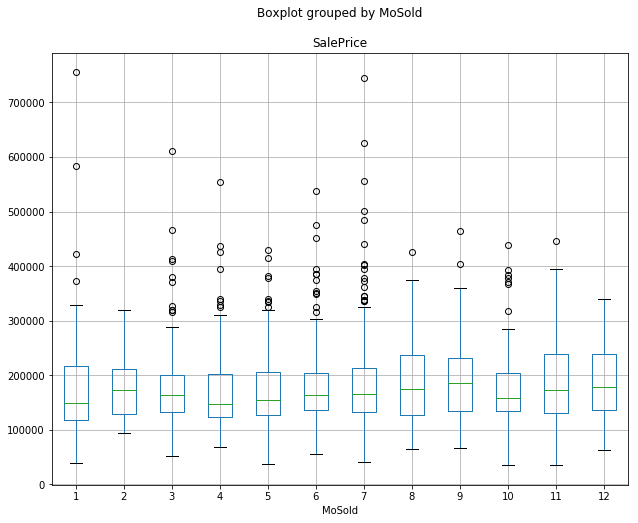

In [259]:
df_train.boxplot('SalePrice', 'MoSold', figsize=(10,8))

In [260]:
print('Missing in train: ', df_train['MoSold'].isnull().sum())
print('Missing in test: ', df_test['MoSold'].isnull().sum())

Missing in train:  0
Missing in test:  0


**NOTE: TO REDUCE DIMENSIONALITY, WE CAN COMBINE INTO SEASONS**

<a name='3.63'></a>
## 3.63 YrSold

Year Sold (YYYY)

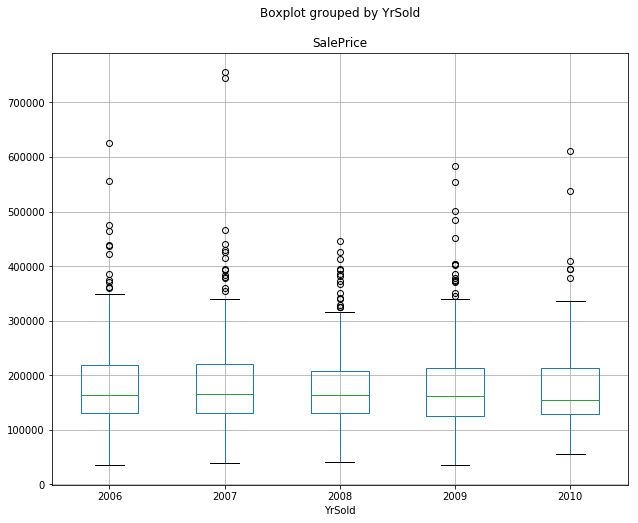

In [261]:
df_train.boxplot('SalePrice', 'YrSold', figsize=(10,8))

In [262]:
print('Missing in train: ', df_train['YrSold'].isnull().sum())
print('Missing in test: ', df_test['YrSold'].isnull().sum())

Missing in train:  0
Missing in test:  0


**NOTE: CONVERT FEATURE TO CATEGORICAL**


<a name='3.64'></a>
## 3.64 SaleType

Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

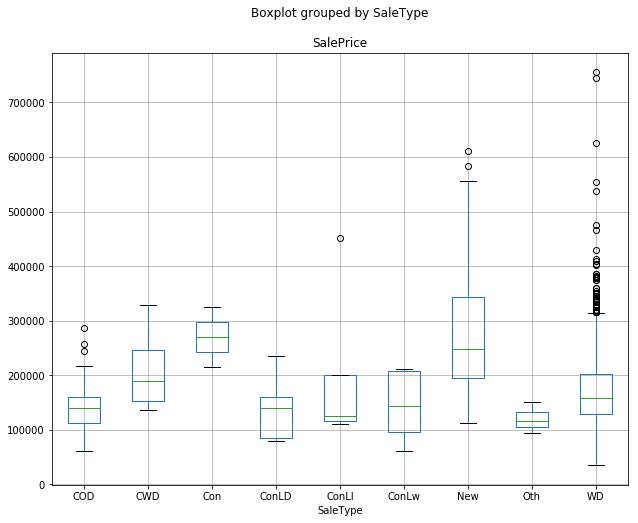

In [263]:
df_train.boxplot('SalePrice', 'SaleType', figsize=(10,8))

In [264]:
print('Missing in train: ', df_train['SaleType'].isnull().sum())
print('Missing in test: ', df_test['SaleType'].isnull().sum())

Missing in train:  0
Missing in test:  1


In [265]:
print(df_train['SaleType'].value_counts())
print(df_test['SaleType'].value_counts())

WD       1263
New       120
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64
WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
ConLw       3
Con         3
Name: SaleType, dtype: int64


**NOTE: COMBINE OBSERVATIONS TO REDUCE DIMENSIONALITY**

In [266]:
df_train['SaleType'] = df_train['SaleType'].apply(lambda x:'Warranty' if x in ['WD', 'CWD', 'WVWD'] else x)
df_train['SaleType'] = df_train['SaleType'].apply(lambda x:'Contract' if x in ['Con', 'ConLw', 'ConLI', 'ConLD', 'Oth'] else x)
df_test['SaleType'] = df_test['SaleType'].apply(lambda x:'Warranty' if x in ['WD', 'CWD', 'WVWD'] else x)
df_test['SaleType'] = df_test['SaleType'].apply(lambda x:'Contract' if x in ['Con', 'ConLw', 'ConLI', 'ConLD', 'Oth'] else x)

In [267]:
print(df_train['SaleType'].value_counts())
print(df_test['SaleType'].value_counts())

Warranty    1267
New          120
COD           43
Contract      24
Name: SaleType, dtype: int64
Warranty    1266
New          117
COD           44
Contract      31
Name: SaleType, dtype: int64


**NOTE: IMPUTE MISSING TEST VALUE TO 'Warranty'**

In [268]:
df_test['SaleType'].fillna('Warranty', inplace=True)


<a name='3.65'></a>
## 3.65 SaleCondition

Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

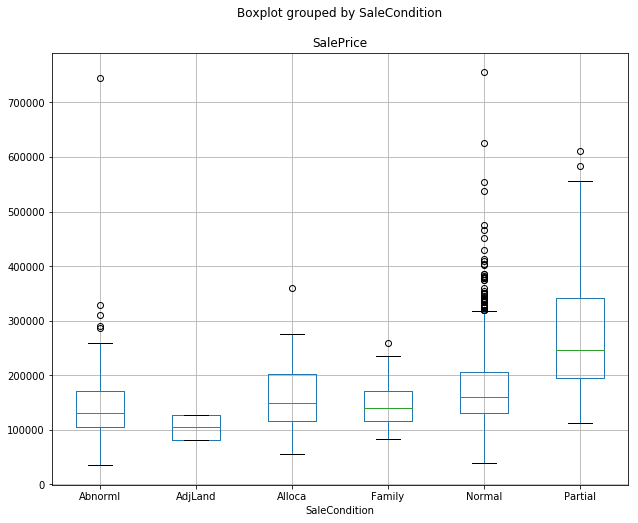

In [269]:
df_train.boxplot('SalePrice', 'SaleCondition', figsize=(10,8))

In [270]:
print('Missing in train: ', df_train['SaleCondition'].isnull().sum())
print('Missing in test: ', df_test['SaleCondition'].isnull().sum())

Missing in train:  0
Missing in test:  0


In [271]:
print(df_train['SaleCondition'].value_counts())
print(df_test['SaleCondition'].value_counts())

Normal     1196
Partial     123
Abnorml      99
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64
Normal     1204
Partial     120
Abnorml      89
Family       26
Alloca       12
AdjLand       8
Name: SaleCondition, dtype: int64
